Pré-processamento de imagens

# 1. Preparando o ambiente
Neste passo é feito a instalação das bibliotecas e recursos necessários

Como o Colab usa um computador com sistema operacional Linux, usamos o comando *!sudo apt intall tesseract-ocr* para fazer o download do pacote


In [5]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

Instalando o pytesseract - biblioteca que sera

In [4]:
!pip install pytesseract

Criando a pasta que vai ter o idioma do tesseract e importando do github

***Necessário importar as imagens para a pasta imagens***

In [6]:
!mkdir tessdata
!mkdir Imagens

In [7]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2024-06-30 15:43:07--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-06-30 15:43:07--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-06-30 15:43:07--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

Importando as bibliotecas de apoio e validando as versões de cada uma

In [8]:
import cv2
import pytesseract

In [9]:
cv2.__version__

'4.8.0'

In [10]:
pytesseract.__version__

'0.3.10'

# 2. Fazendo a Leitura das Imagens

In [11]:
imagem = cv2.imread("/content/Imagens/trecho_livro.png")

In [12]:
from google.colab.patches import cv2_imshow

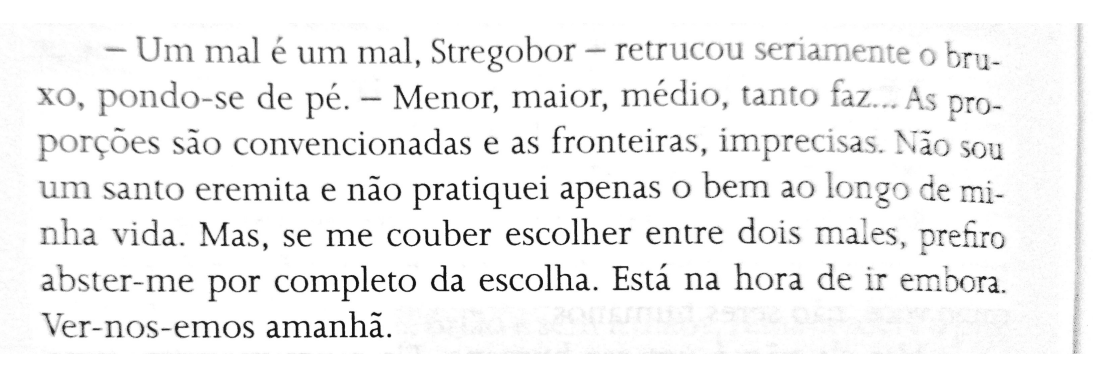

In [13]:
cv2_imshow(imagem)

In [14]:
texto = pytesseract.image_to_string(imagem)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



Para melhorar o texto extraido usamos o PSM na hora de eextrair o

In [15]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [16]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [17]:
texto = pytesseract.image_to_string(imagem, lang = 'por', config = config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



# 3. Realizando o procedimento com as placas de carros


Primeiro abrimos a imagem e transformamos ela para uma escala de cinza para que o tesseract possa reconhecer melhor os caracteres

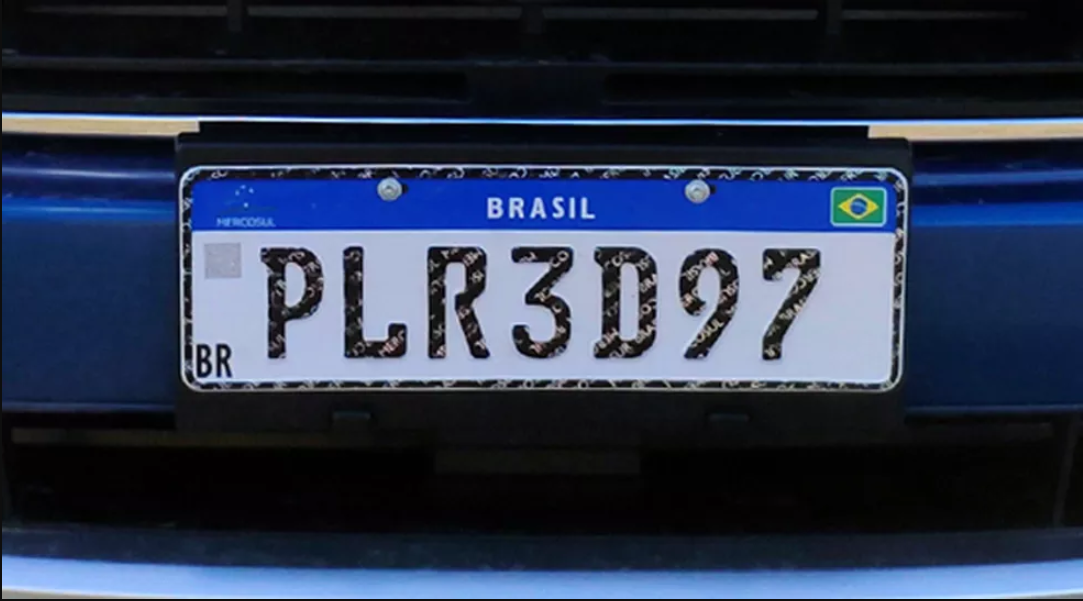

In [74]:
imagem2 = cv2.imread('/content/Imagens/placa_carro1.png')
cv2_imshow(imagem2)

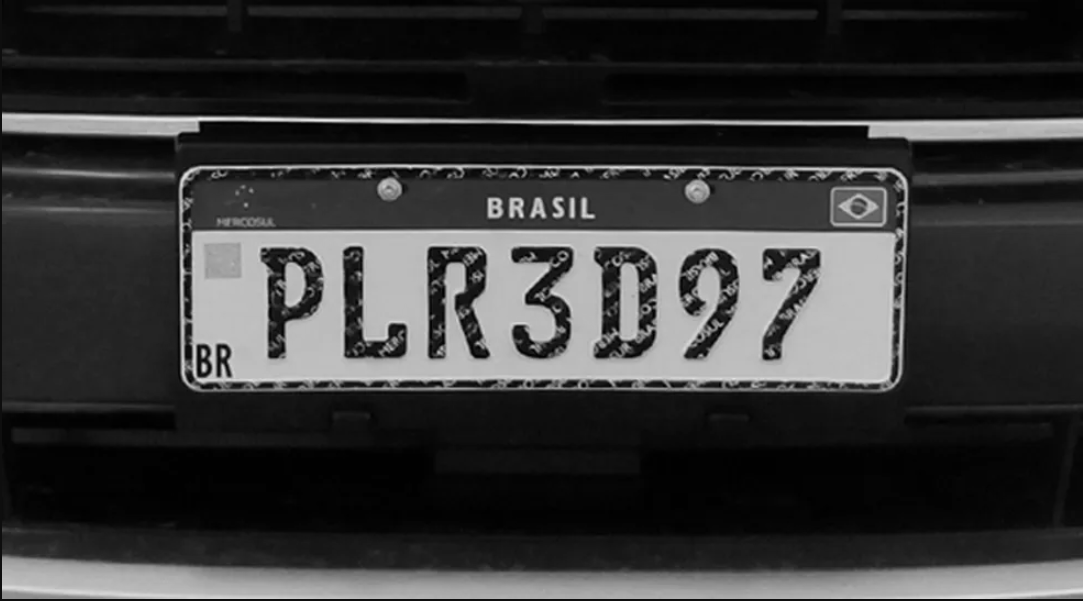

In [75]:
imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem2)

In [76]:
config_tesseract = '--tessdata-dir tessdata'

Nesta caso o texto não é extraído conforme o exemplo abaixo. Vamos começar a tratar as imagens.

In [77]:
texto = pytesseract.image_to_string(imagem2, lang = 'por', config = config_tesseract)
print(texto)

# 4. Limiarização

Vamos comparar todos os pixeis de uma imagem com um valor limite que será definido da escala de cinza. A escala varia de 0 (preto) até 255(branco).

Tudo que estiver abaixo deste valor será "transformado" em preto

link opencv: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


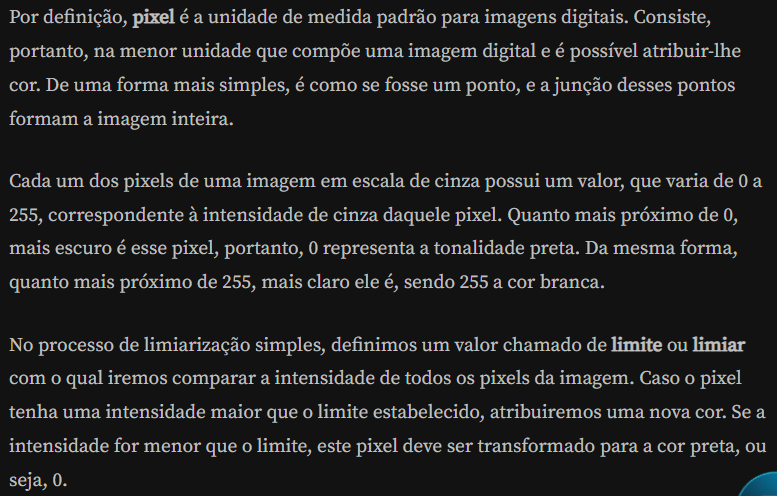

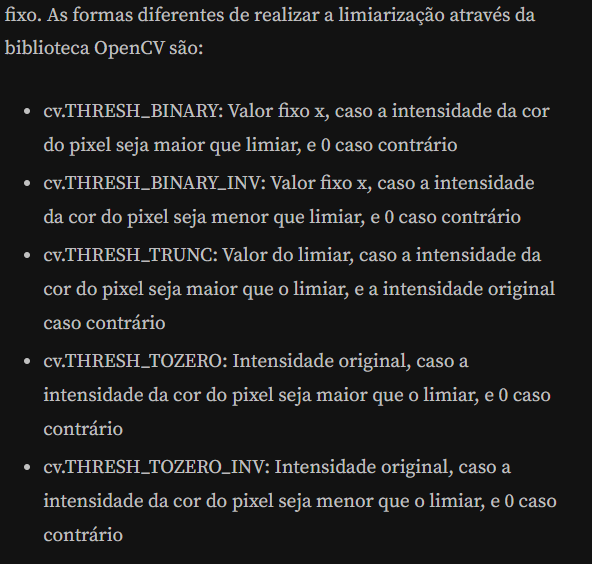

## **Limiarização Simples**

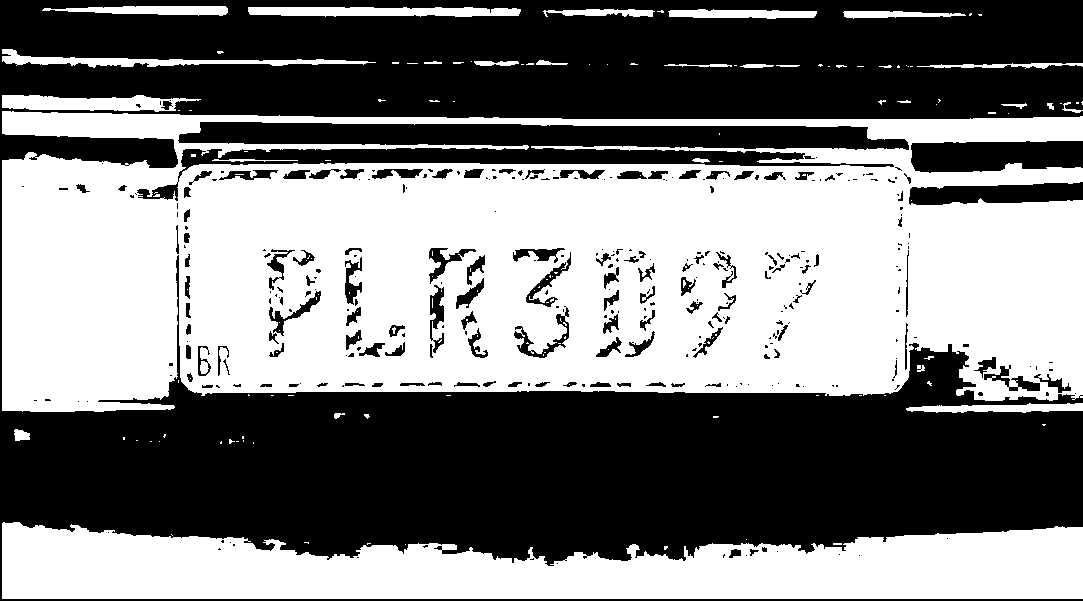

In [22]:
##cv2.threshold --> retorna o valor do limiar e a imagem limiarizada
## parametros -> 1 imagem em escala de cinza,
##2 limiar,
##3 cor que quero transformar caso o valor > limear,
## 4 métoro de limiaização
limiar = 25
valor, lim_simples = cv2.threshold(imagem2, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

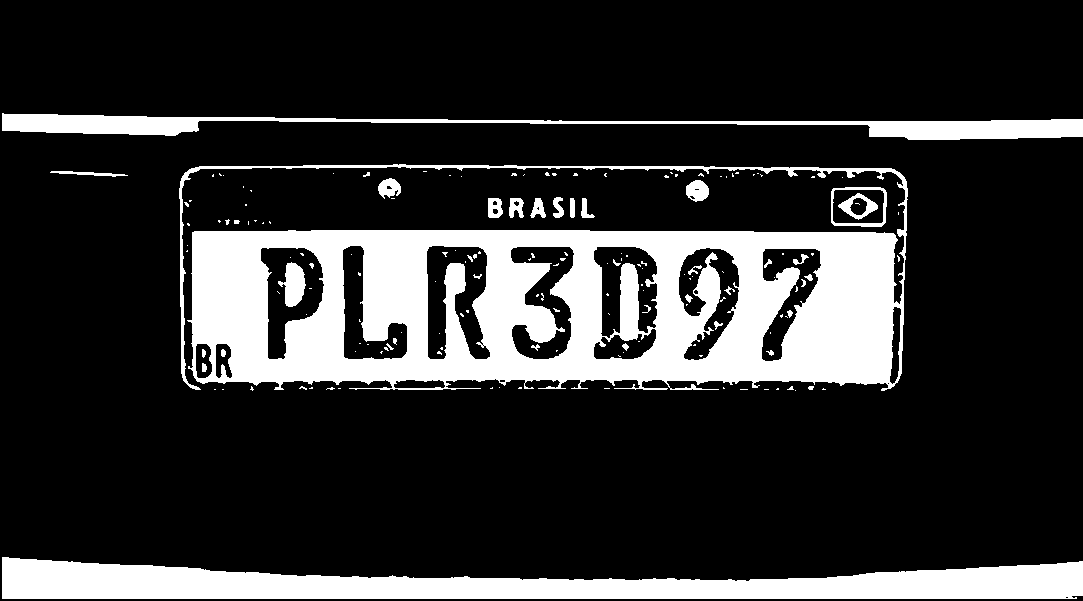

In [23]:
##cv2.threshold --> retorna o valor do limiar e a imagem limiarizada
## parametros -> 1 imagem em escala de cinza,
##2 limiar,
##3 cor que quero transformar caso o valor > limear,
## 4 métoro de limiaização
limiar = 125
valor, lim_simples = cv2.threshold(imagem2, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

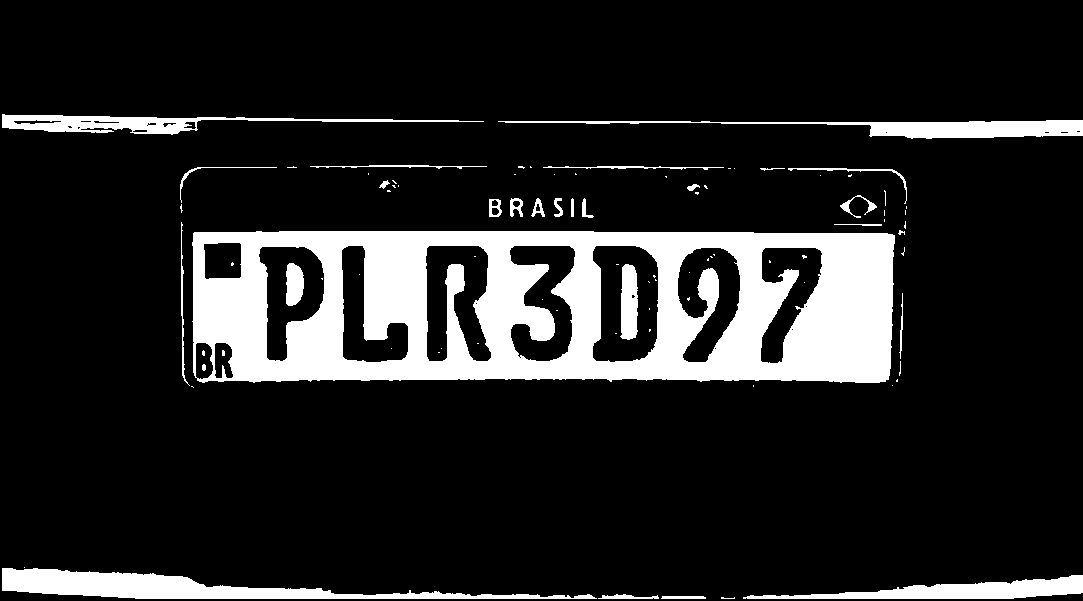

In [24]:
##cv2.threshold --> retorna o valor do limiar e a imagem limiarizada
## parametros -> 1 imagem em escala de cinza,
##2 limiar,
##3 cor que quero transformar caso o valor > limear,
## 4 métoro de limiaização
limiar = 170
valor, lim_simples = cv2.threshold(imagem2, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

## **Limiarização Adaptativa**

Pode ser por média ou gausseana.
negrito
Neste caso é utilizado um limite para cada região da figura separadamente


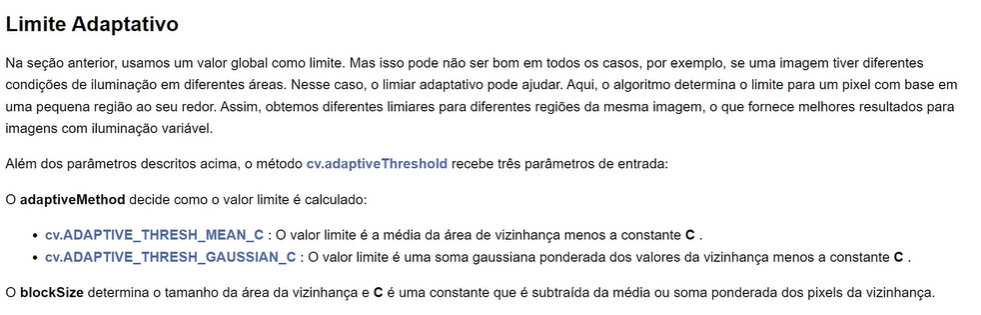

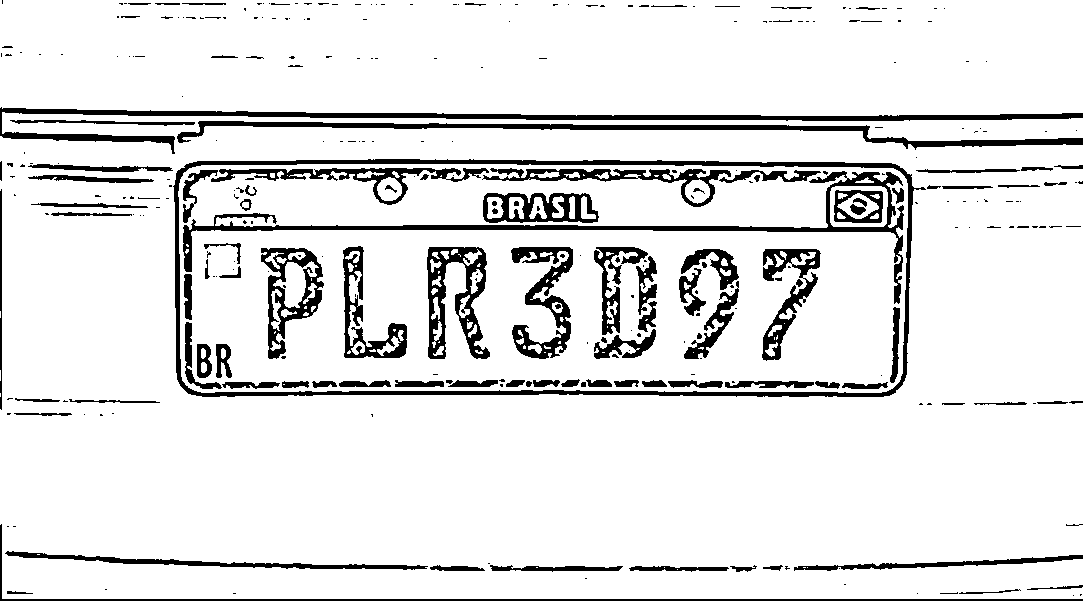

In [25]:
#Parâmetros: 1- imagem, 2- valor para qual vai transformar, 3 - modo (média ou gaussiana)
# 4- tamanho da região que vai tirar a média da limiar e 5 - constante

lim_adapt = cv2.adaptiveThreshold(imagem2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

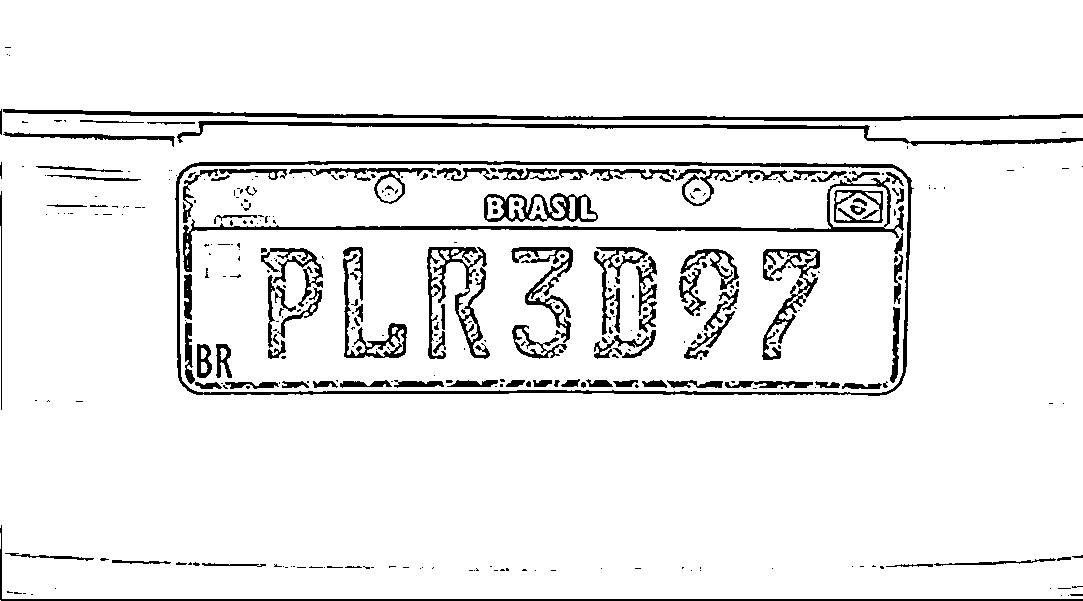

In [26]:
#Parâmetros: 1- imagem, 2- valor para qual vai transformar, 3 - modo (média ou gaussiana)
# 4- tamanho da região que vai tirar a média da limiar e 5 - constante

lim_adapt = cv2.adaptiveThreshold(imagem2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

## **Limiarização de Otsu**

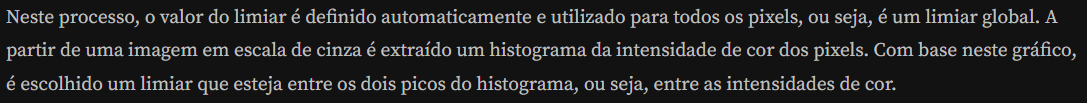

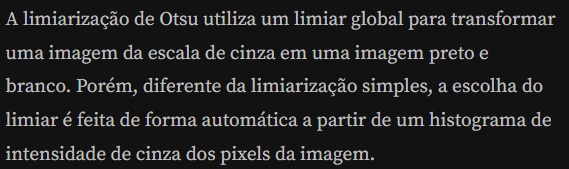

1. criar histograma para verificar a intensidade das cores da imagem em escala de cinza

In [27]:
imagem2

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

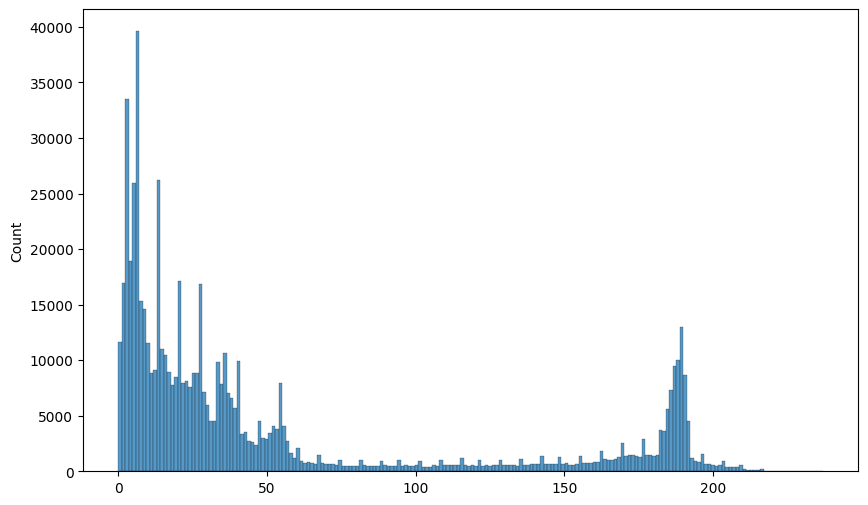

In [28]:
import seaborn as sns
ax = sns.histplot(imagem2.flatten())   #flatten transforma o array da imagem em um array de uma única dimensão
ax.figure.set_size_inches(10,6)

2. criar a imagem com a limiarização

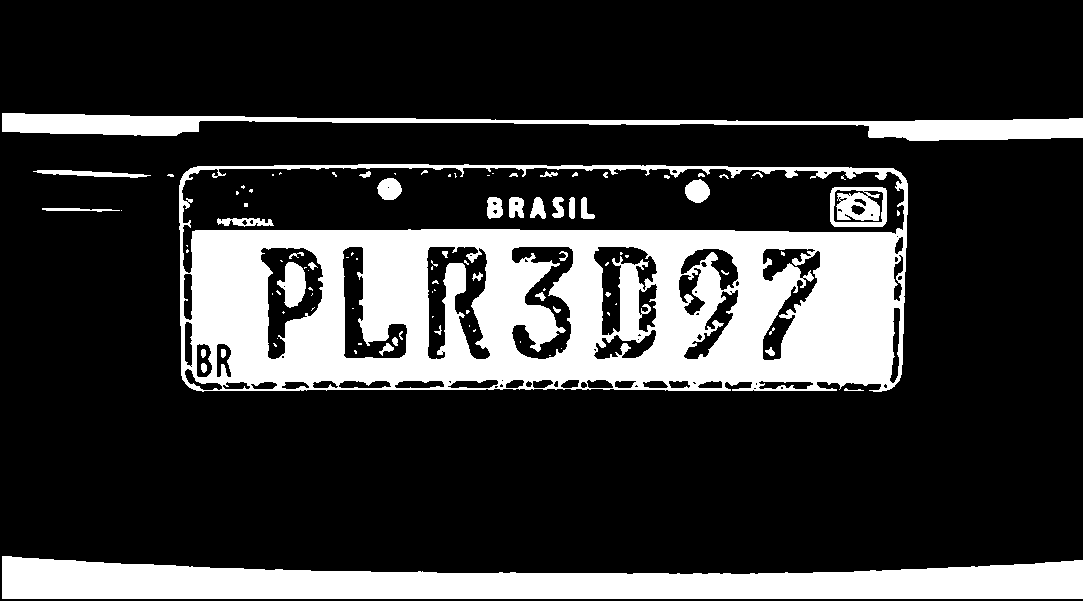


limiar: 96.0


In [29]:
valor,lim_ostu = cv2.threshold(imagem2, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_ostu)
print(f'\nlimiar: {valor}')

3. Extrair o texto da imagem limiarizada

In [30]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_ostu, lang = 'por', config = config_tesseract)
print(texto)

# 5. Transformação Morfológica

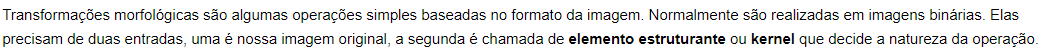

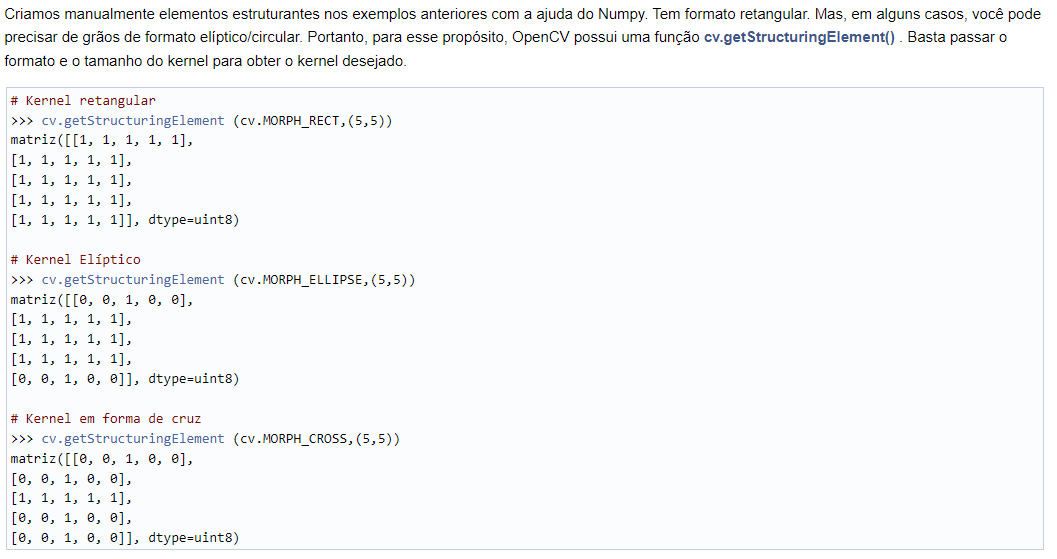

## Erosão


A erosão faz com que os pixeis pretos fiquem maiores e com isso faz com que as falhas de pontos brancos desapareçam.
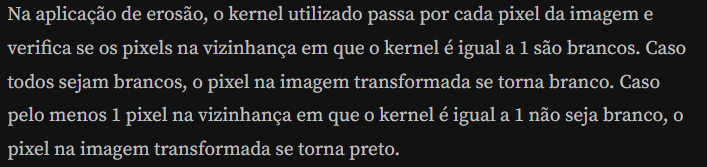

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

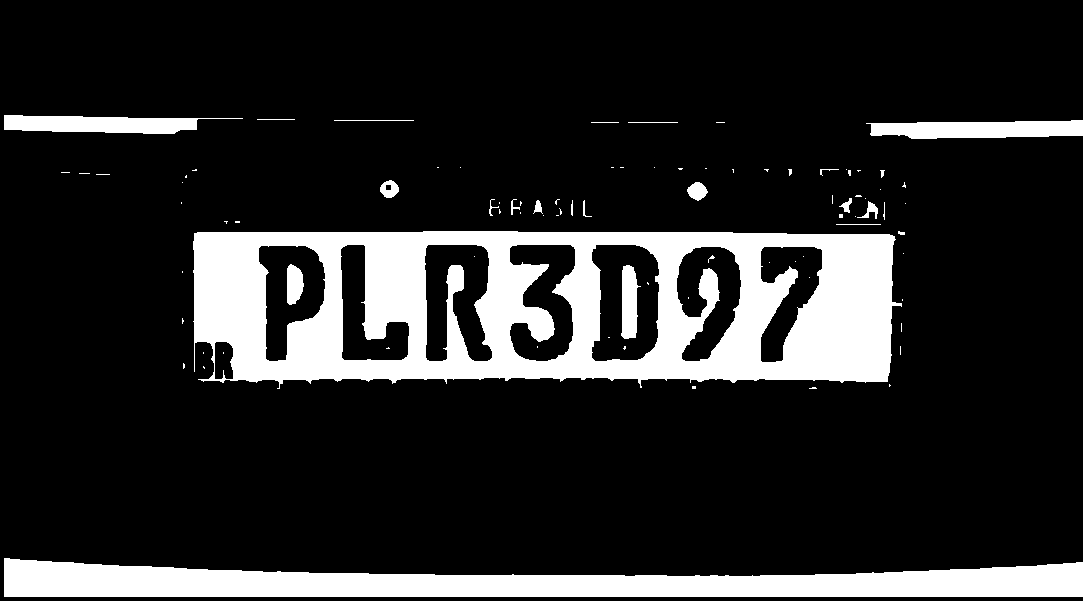

In [32]:
erosao = cv2.erode(lim_ostu, kernel)
cv2_imshow(erosao)

In [33]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang = 'por',  config = config_tesseract)
print(texto)

, PLRSD97 |
— :” NS ss



## Dilatação

A dilatação faz com que os pixeis brancos fiquem maiores. Neste caso os pontos brancos "de falha" ficam mais aparentes.
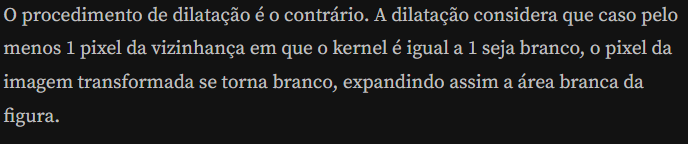

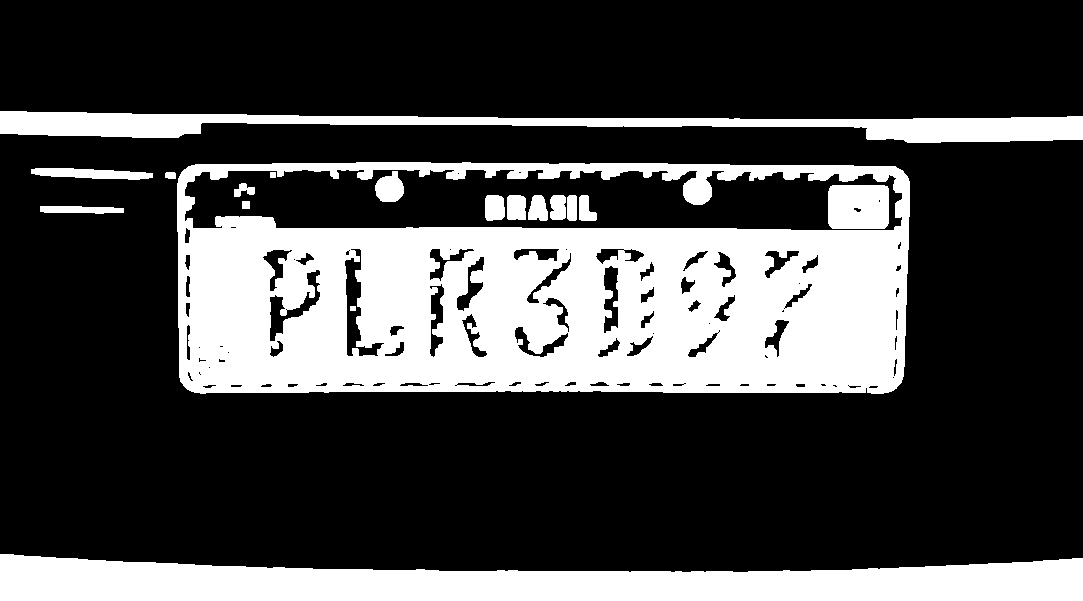

In [47]:
dilatacao = cv2.dilate(lim_ostu, kernel)
cv2_imshow(dilatacao)

## Abertura

A abertura é um processo que depende da erosão e da dilatação. Neste caso a ideia é que seja realizado uma erosão e em seguida uma dilatação. Desta forma, as falhas irão sumir na erosão e o caractere irá "aumentar" na dilatação.


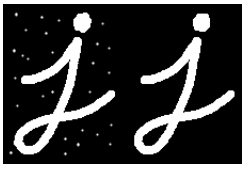

In [48]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

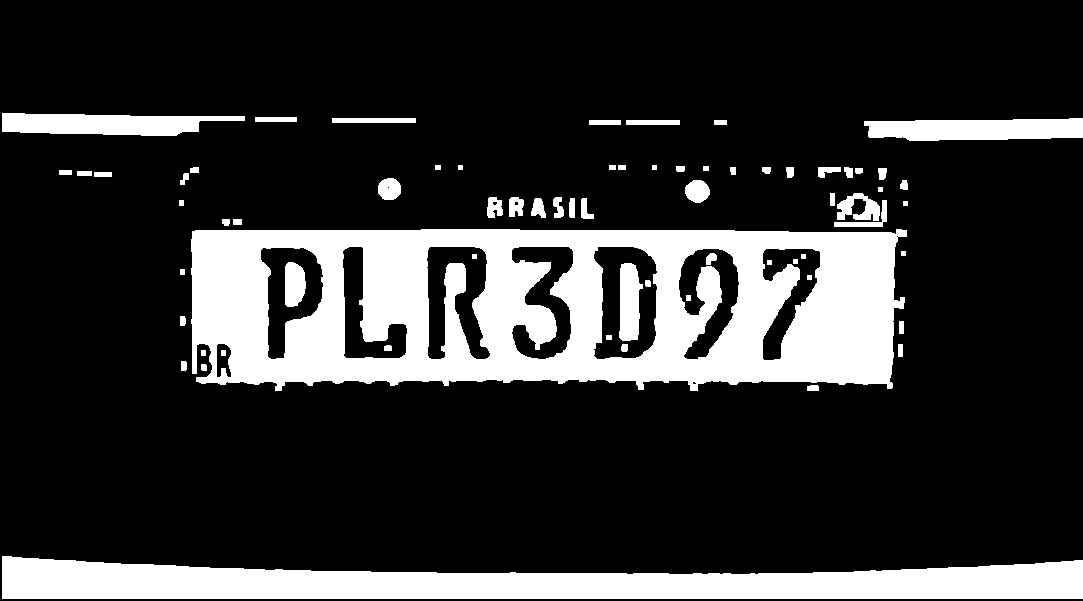

In [49]:
abertura = cv2.morphologyEx (lim_ostu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

## Fechamento

O fechamento é o processo contrário da abertura, ou seja, primeiro é feito uma dilatação e em seguida é feito uma erosão.

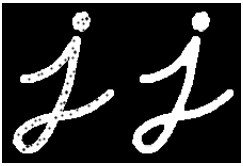

In [50]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

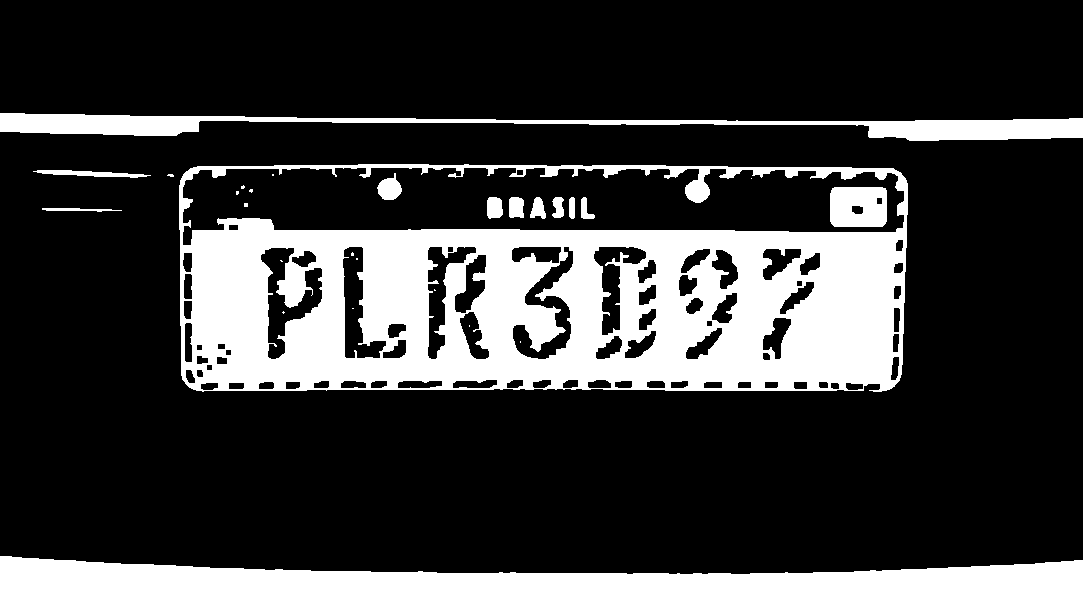

In [51]:
fechamento = cv2.morphologyEx (lim_ostu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

## Gradiente Morfológico

O gradiente morfológico é a diferença entre a dilatação e a erosão de uma imagem.

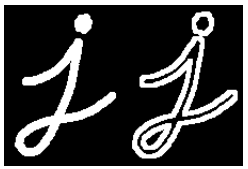

In [52]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

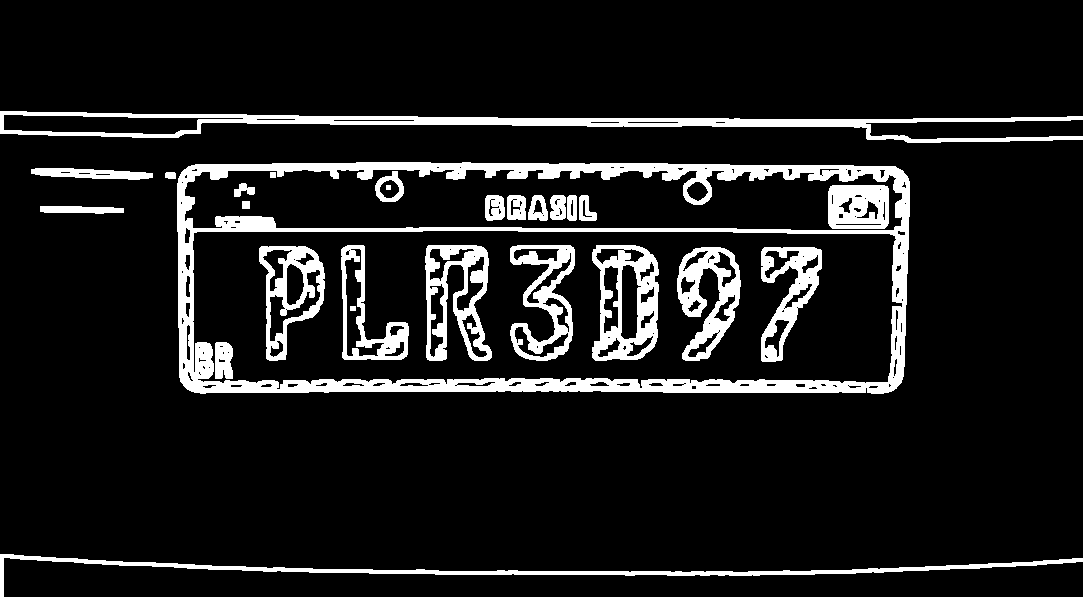

In [53]:
gradiente = cv2.morphologyEx (lim_ostu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)

## Cartola

Cartola é a diferença entre a imagem de entrada e a abertura da imagem. Neste caso pode aplicar o cartola tanto para a imagem limiarizada quanto para a de escala de cinza.  

Essa técnica é muito útil quando queremos realçar objetos ou regiões claras que estão em um fundo escuro, pois ela remove o fundo e deixa apenas as áreas de interesse.

Então, em resumo, a Cartola é uma transformação morfológica que visa destacar as regiões claras de uma imagem, removendo o fundo escuro e deixando apenas os objetos de interesse.

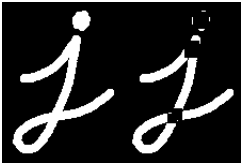

In [54]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))  #40,13 --> tamanho da placa

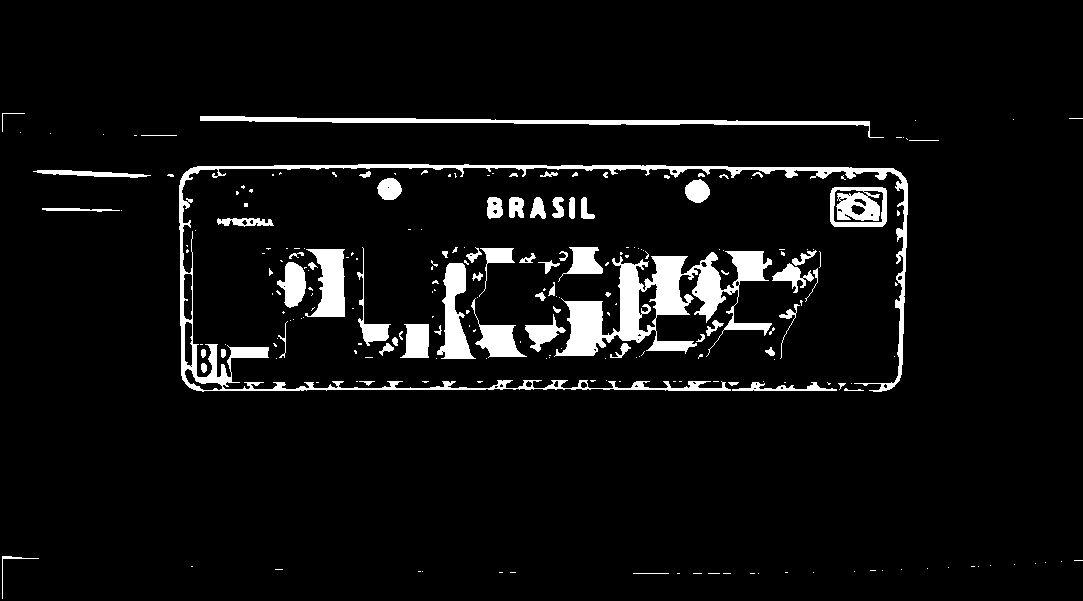

In [55]:
cartola = cv2.morphologyEx (lim_ostu, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

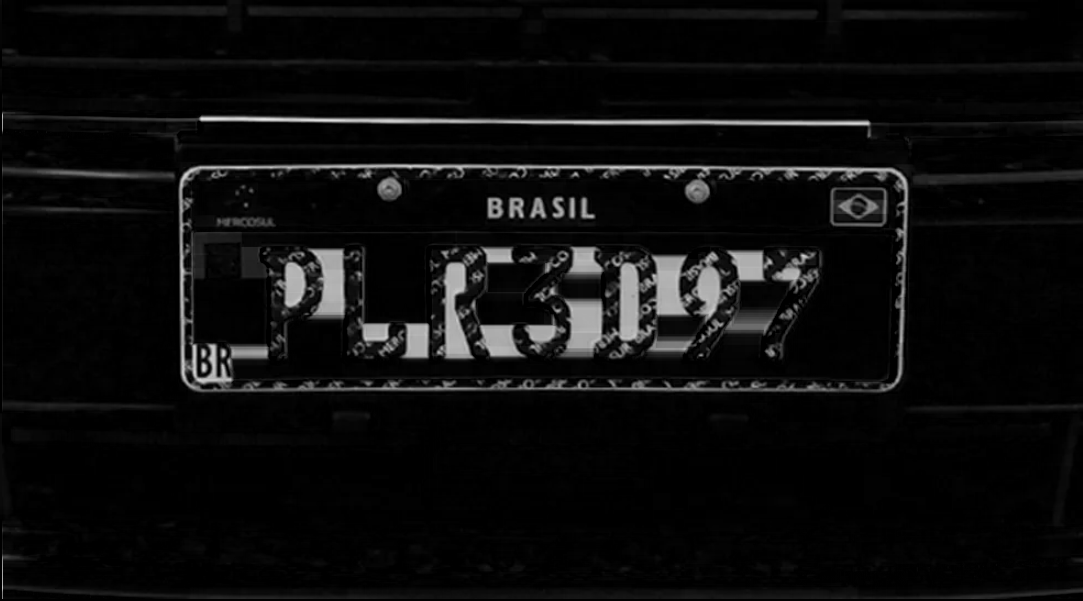

In [56]:
cartola = cv2.morphologyEx (imagem2, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(cartola)

## Chapéu Preto

Chapéu preto é a diferença entre o fechamento da imagem de entrada e a imagem de entrada. Transforma a imagem em preto e branco.

Neste caso pode aplicar o cartola tanto para a imagem limiarizada quanto para a de escala de cinza.

Essa técnica é muito útil quando queremos realçar objetos ou regiões escuras que estão em um fundo claro, pois ela remove o fundo e deixa apenas as áreas de interesse.

Então, em resumo, o Chapéu Preto é uma transformação morfológica que visa destacar as regiões escuras de uma imagem, removendo o fundo claro e deixando apenas os objetos de interesse.


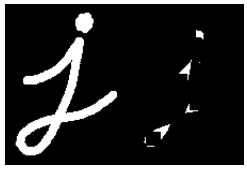

In [57]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))  #40,13 --> tamanho da placa

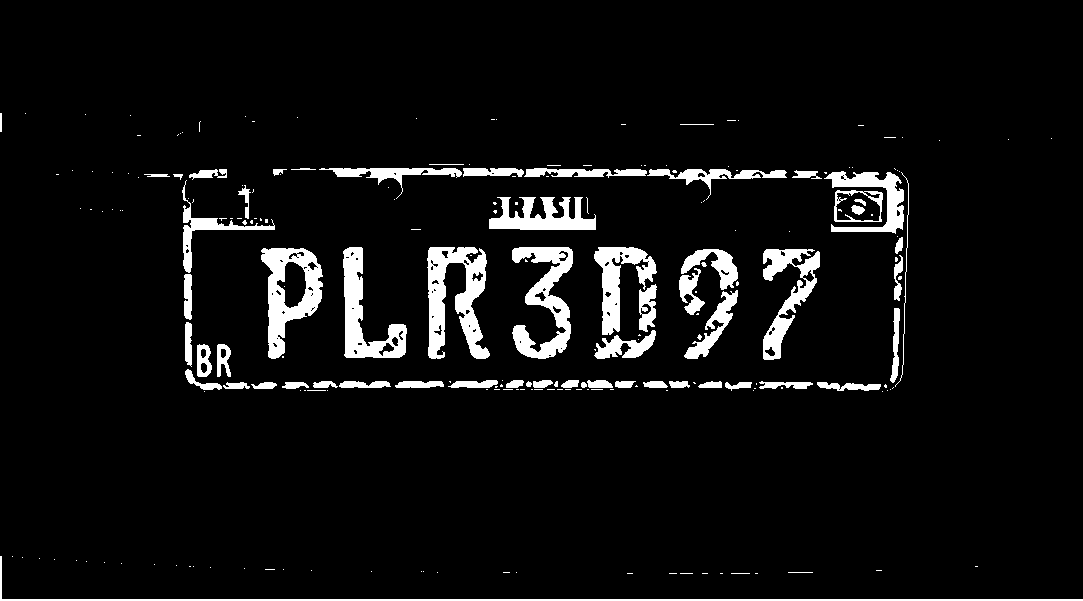

In [58]:
chapeu_preto = cv2.morphologyEx (lim_ostu, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

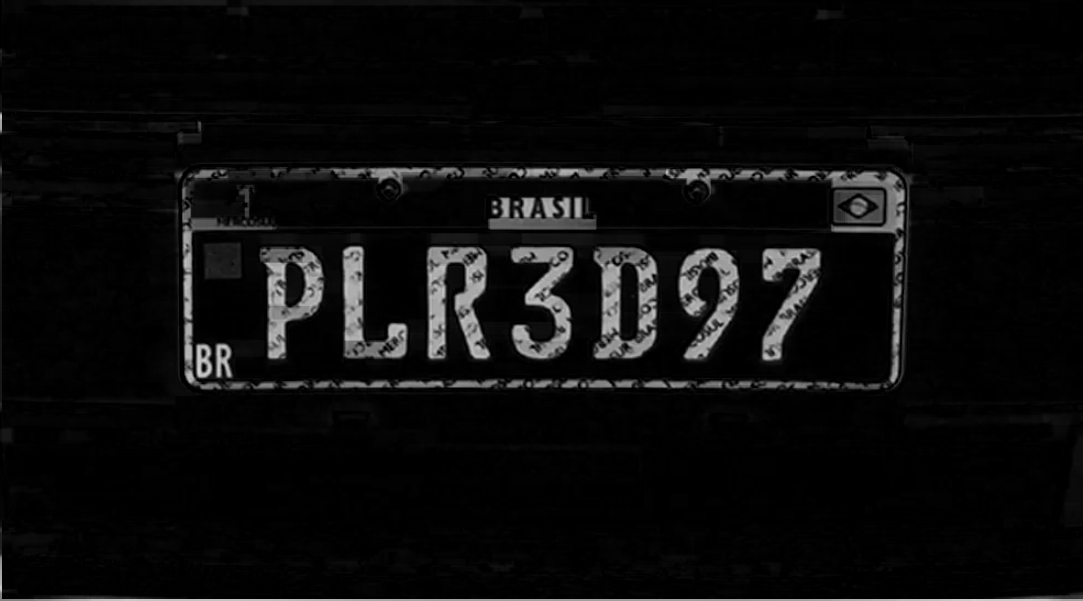

In [59]:
chapeu_preto = cv2.morphologyEx (imagem2, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

# 6. Bordas e Contornos

Nesta parte vamos fazer uma abordagem onde será identificado o local onde está o texto na imagem para poder "auxiliar" o pytesseract a extrair o texto.

Com isso será eliminado os ruídos da imagem.

1. primeiro vamos extrair todas as bordas da imagem (a partir de uma função). Com isso serão identificados todas as coordenadas dos contornos, em seguida os contornos serão aproximados por polígonos.

    Neste caso, os polígonos de 4 lados serão considerados como parte da placa.

Link: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

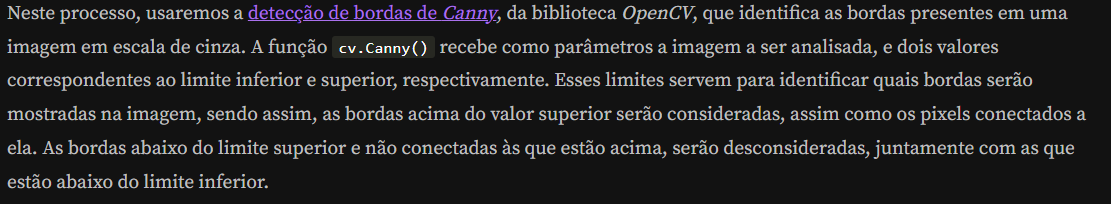

Link: https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html

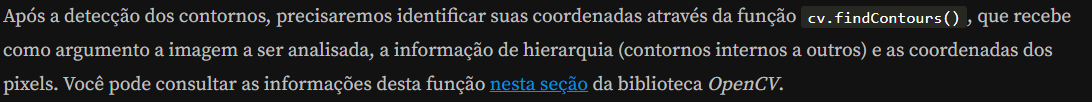

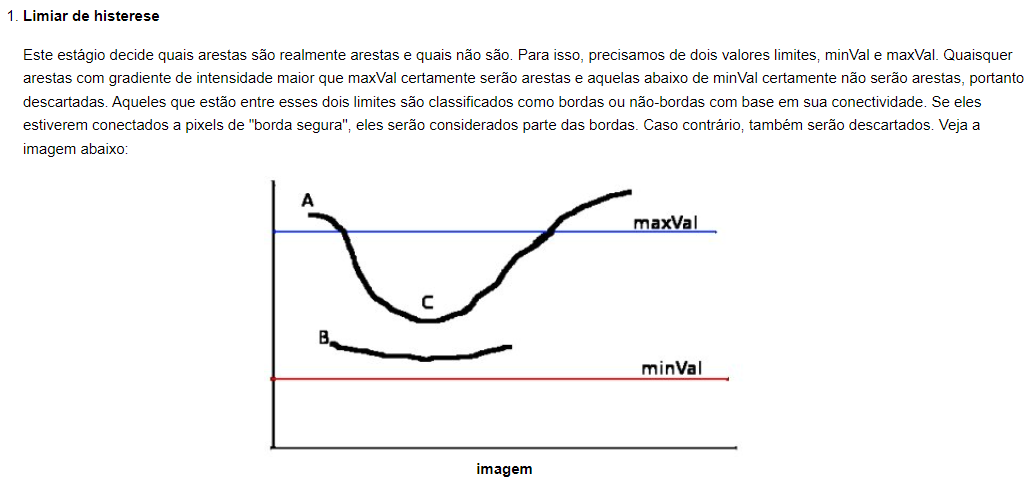

Link Gaussian Blur: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html


Link Sobel: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d

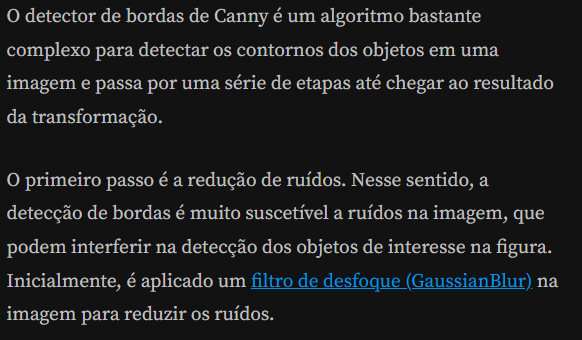

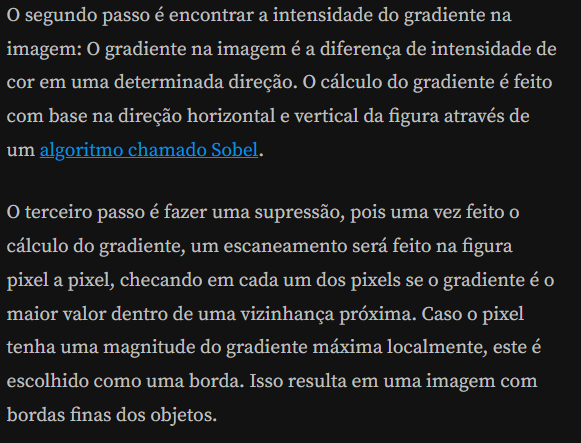

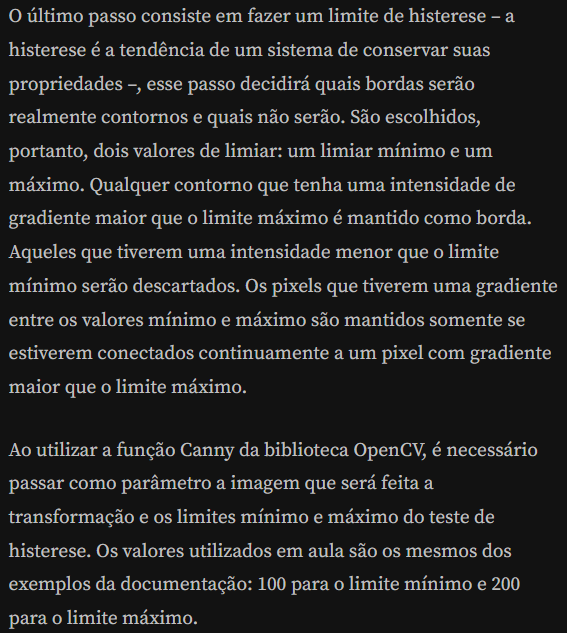

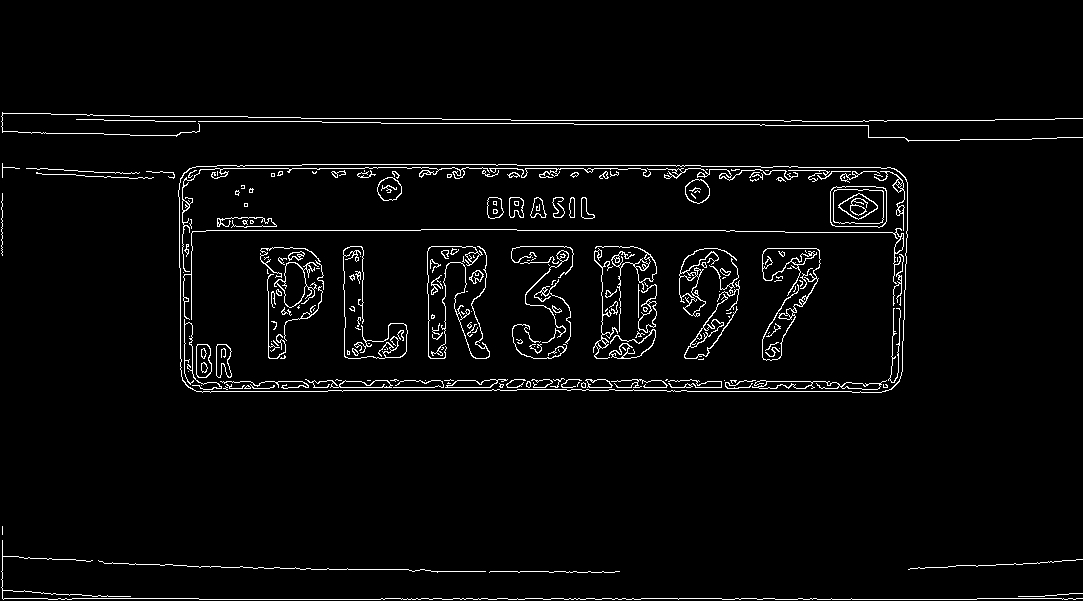

In [78]:
bordas = cv2.Canny(imagem2, 100, 200)
cv2_imshow(bordas)

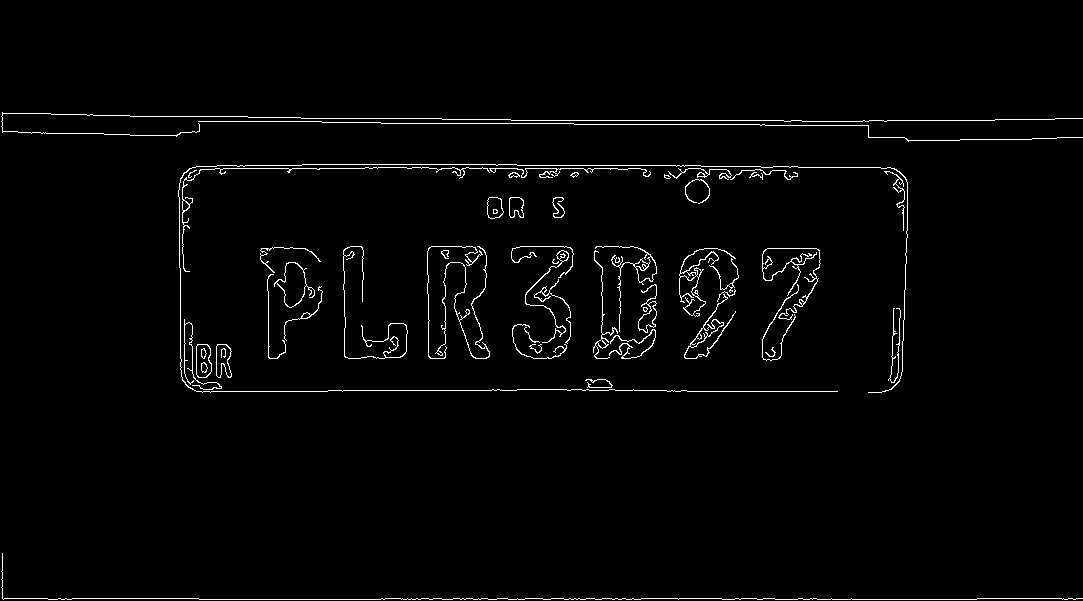

In [79]:
bordas_2 = cv2.Canny(imagem2, 200, 600)
cv2_imshow(bordas_2)

In [80]:
# cv2.RETR_TREE -> GUARDA TODAS AS FUNÇÕES DE HIERARQUIA
# cv2.CHAIN_APPROX_SIMPLE -> GUARDA O PONTO INICIAL E O FINAL DE UM CONTORNO
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [81]:
contornos

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

Agora vamos aproximar os contornos através da função cv.approxPolyDP().
link: https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c

Será criada uma condicional (1) que deve conferir se o contorno criado é convexo, ou seja, se é possível traçar uma linha de qualquer ponto a qualquer outro ponto dentro do polígono, sem cortar a sua borda. Também será aplicada outra condição (2) que diz respeito sobre o tamanho da aproximação ser igual a 4, no caso, se gera 4 coordenadas, performando 4 lados.

In [82]:
for contorno in contornos:
  epsilon = 0.02 * cv2.arcLength(contorno, True) # true -> contorno fechado
  aproximacao = cv2.approxPolyDP(contorno, epsilon, True)  # true -> contorno fechado
  if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4: # condicional 1 e 2
    localizacao = aproximacao # guarda a localização do retângulo
    break


In [83]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

2. Agora vamos extraír o ponto inicial, largura e comprimento. Em seguida vamos filtrar a imagem inicial

In [84]:
x, y, w, h = cv2.boundingRect(localizacao)

In [85]:
print(f'X: {x}  \nY: {y}  \nW: {w}  \nH: {h}  \n')

X: 180  
Y: 168  
W: 722  
H: 224  



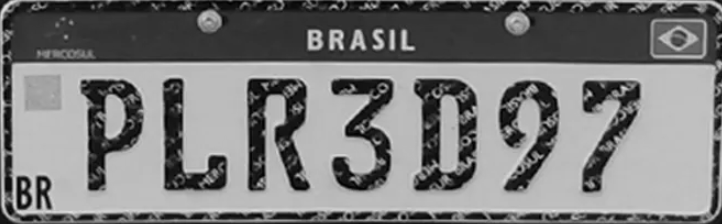

In [86]:
placa = imagem2[y: y+h, x: x+w]
cv2_imshow(placa)

3. Vamos melhorar a qualidade da imagem "placa" para poder extrair o texto. Para isso será feito: 1- Limiarização, 2 - Erosão, 3 -Tesseract

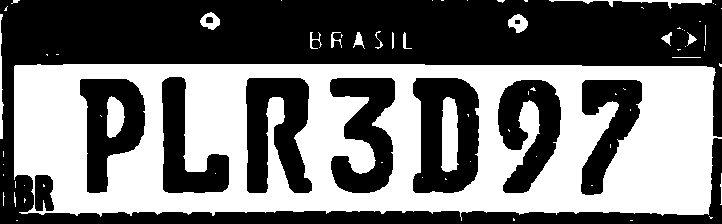



Texto da placa: L PLR3D97



In [92]:
#1 Limiarização de otsu
valor_Placa, lim_ostuPlaca = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2_imshow(lim_ostuPlaca)
#print(f'\nlimiar: {valor_Placa}')

#2 Erosão
kernel_placa = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
erosao_placa = cv2.erode(lim_ostuPlaca, kernel_placa)
cv2_imshow(erosao_placa)

#3 Tesseract
config_tesseract_placa = '--tessdata-dir tessdata --psm 6'
texto_placa = pytesseract.image_to_string(erosao_placa, lang = 'por',  config = config_tesseract_placa)
print('\n')
print(f'Texto da placa: {texto_placa}')


4. Vamos usar o regex para melhorar a qualidade da extração do texto

In [94]:
import re
texto_placa_regex = re.search('\w{3}\d{1}\w{1}\d{2}',texto_placa)
print(f'Texto da placa v2 - dados: {texto_placa_regex}')
print(f'Texto da placa v2: {texto_placa_regex.group(0)}')

Texto da placa v2 - dados: <re.Match object; span=(2, 9), match='PLR3D97'>
Texto da placa v2: PLR3D97


# Novo Cenário: aplicando as mesmas técnicas em outra placa

## 1. Importar imagem, transformar para escala de cinza e realizar extração inicial

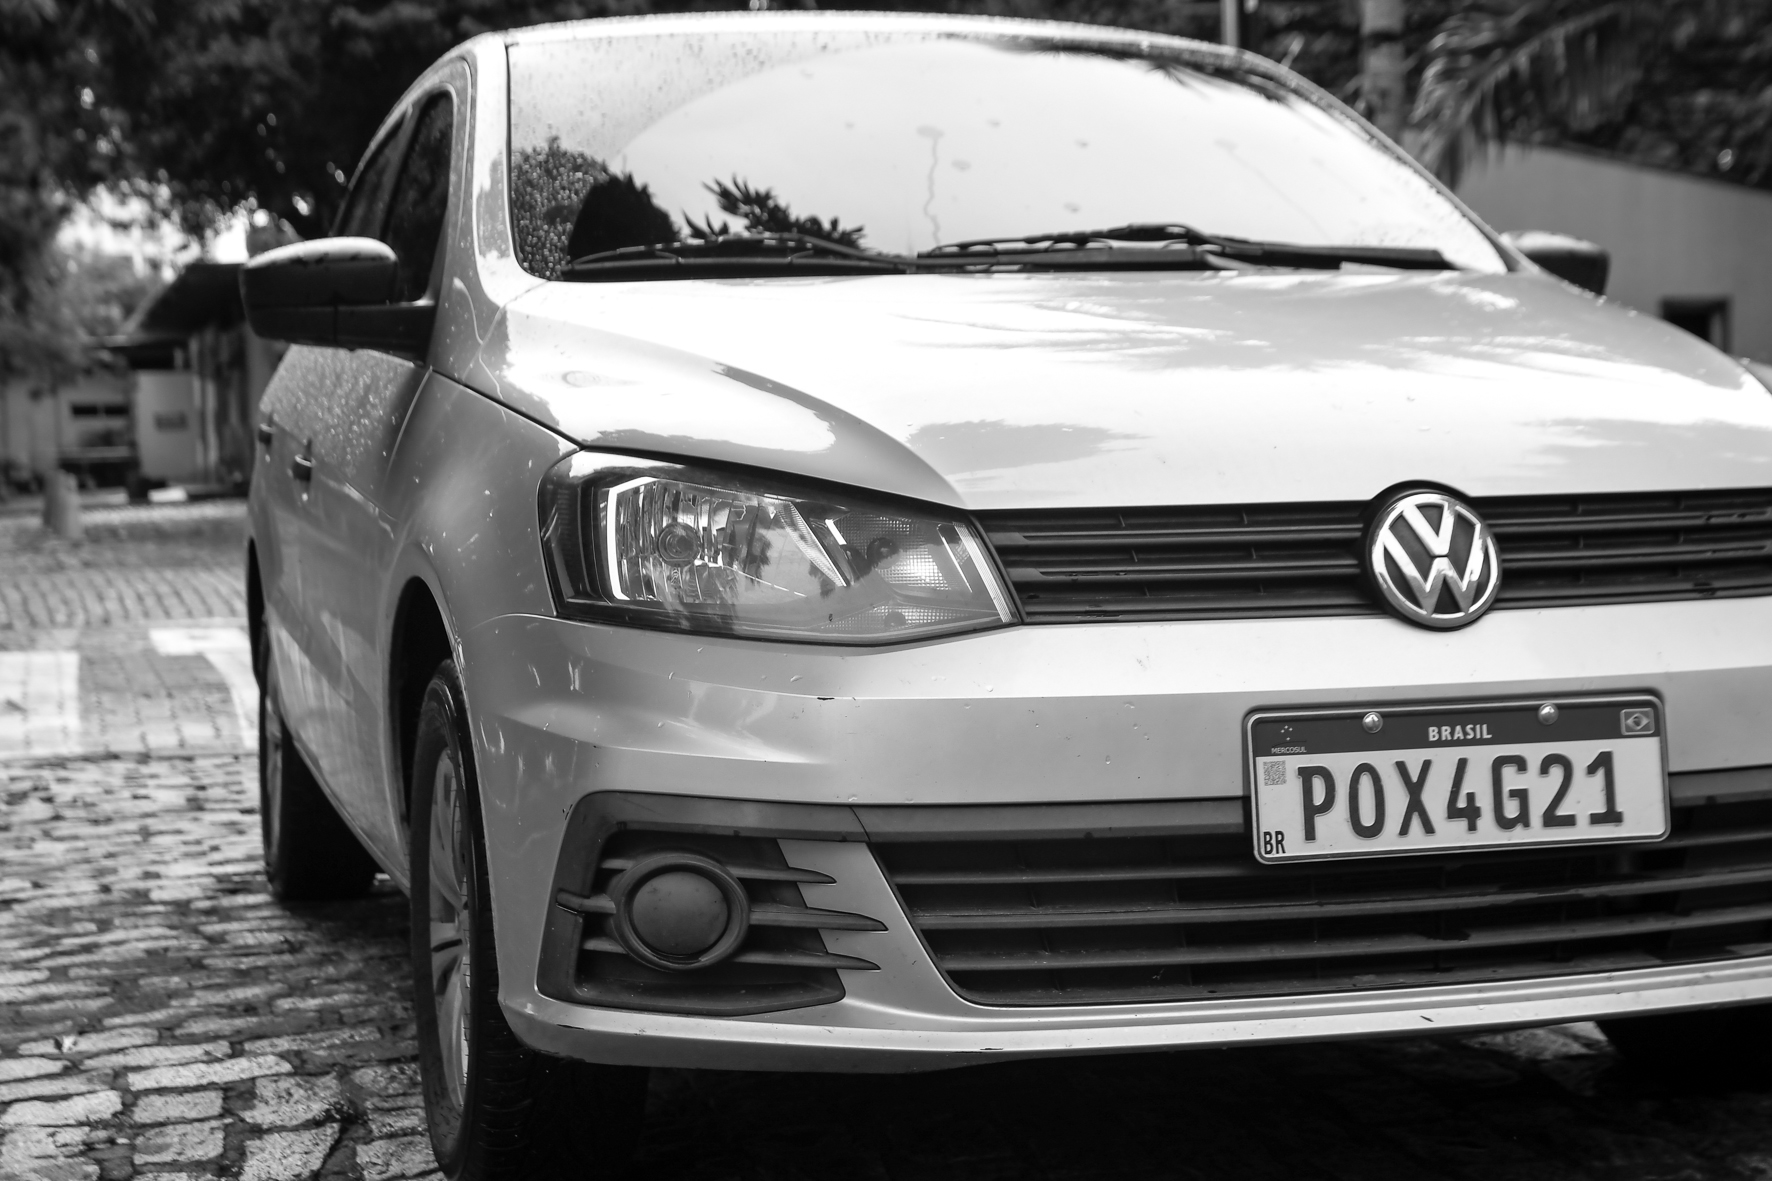

In [110]:
imagem  = cv2.imread('/content/Imagens/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

In [102]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(imagem, lang = 'por',  config = config_tesseract)
print(f'Texto extraído: {texto}')

Texto extraído: R " J '
X . Á FE
: Ô I =E
* Iu. R D 'j U y l Ã . p
. s &x? ç '.( '-.._, T sE
: ,F =, .'_ “ á / ª;"álmí*,êwg_:; Nem oss— .
—— h TEm í-'“,?í
” — = " | ” R p í
A E S A É
S N POX4621
s À | A an
V.A _v.- tee E
a pcaee SDA a —
— | ª—;—j
—— =



## 2. Indentificar a localização da placa na imagem, extrair bordas e contornos e identificar a localização do polígono

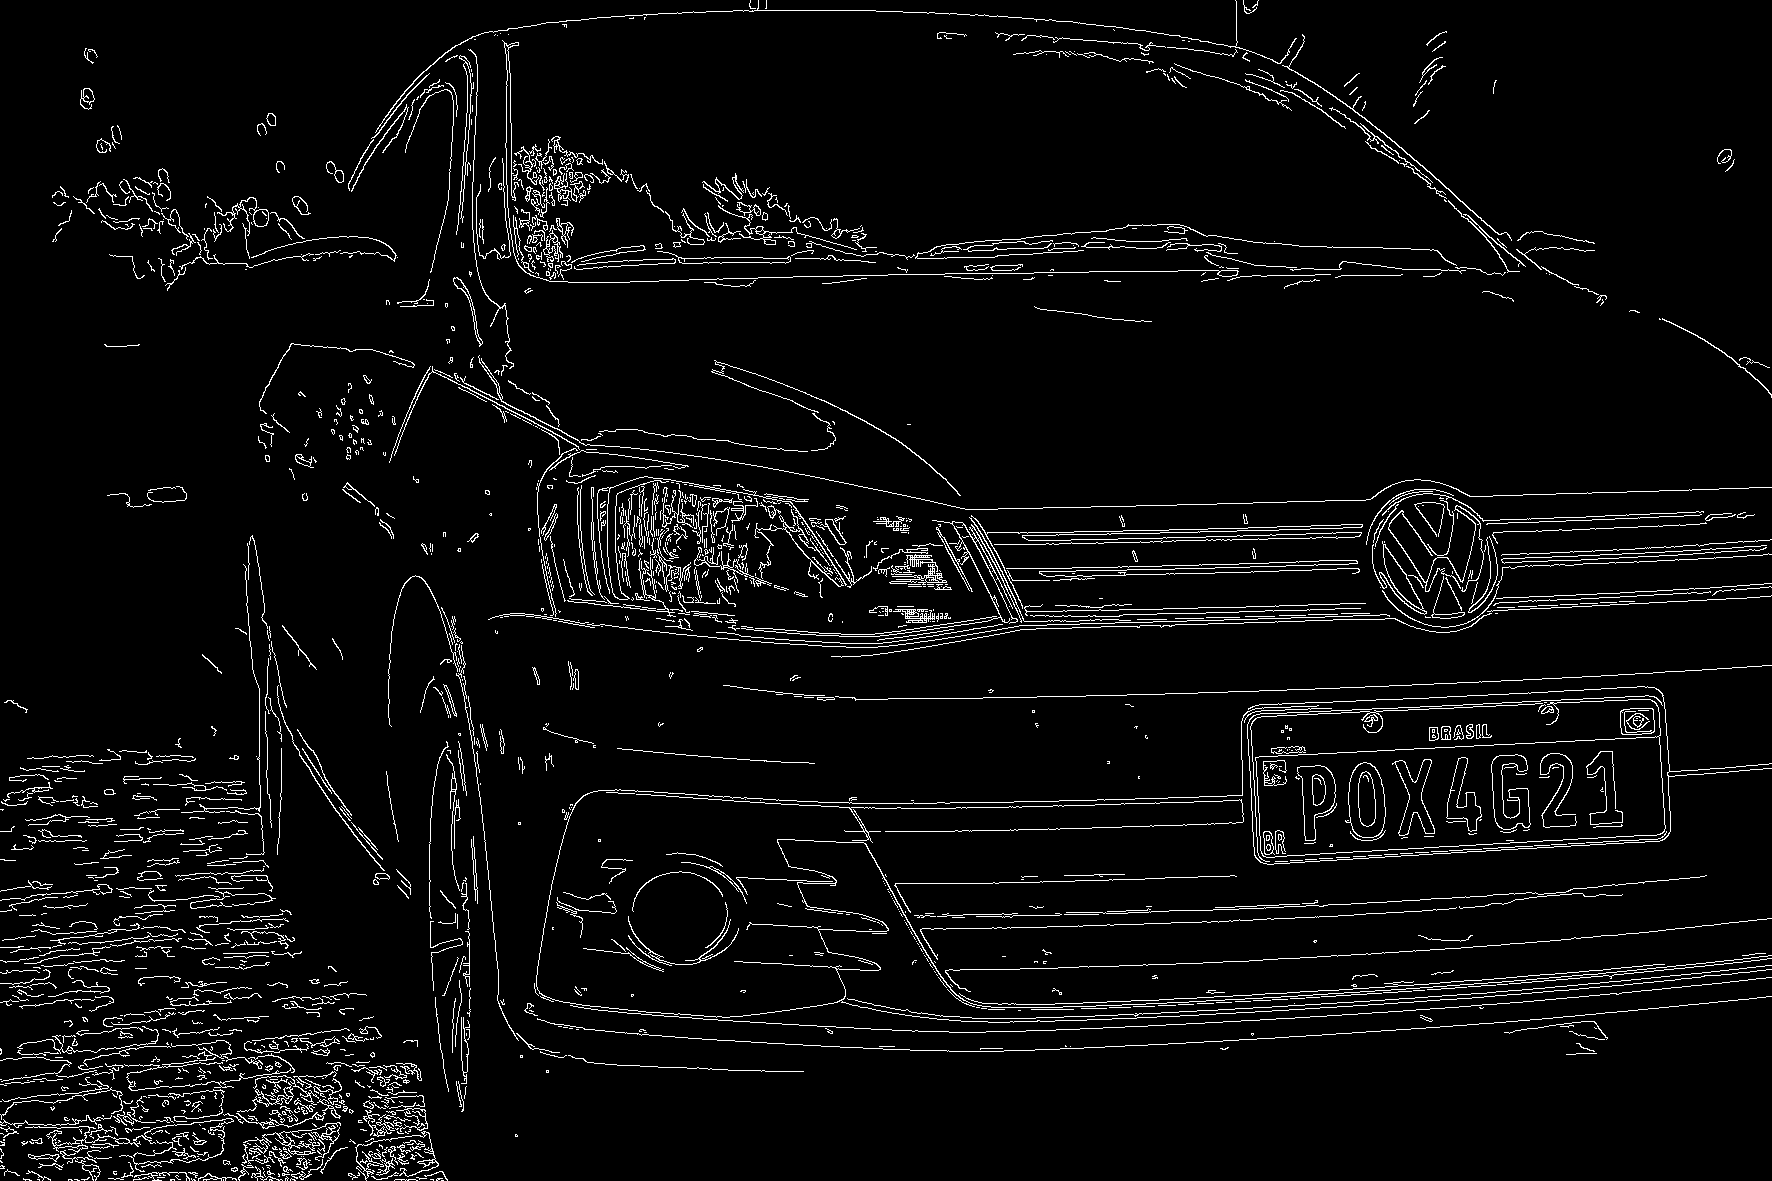

In [104]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)


In [114]:
#Localizar os contornos e hierarquias
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse = True)[:10]  #orderna os contornos e pega apenas os 10 primeiros com a maior área

#Loop para identificar a localização da placa do carro
for contorno in contornos:
  epsilon = 0.02 * cv2.arcLength(contorno, True) # true -> contorno fechado
  aproximacao = cv2.approxPolyDP(contorno, epsilon, True)  # true -> contorno fechado
  if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4: # condicional 1 e 2
    localizacao = aproximacao # guarda a localização do retângulo
    break

print(f'Localização: {localizacao}\n')

#identificar ponto inicial, largura e comprimento da placa
x, y, w, h = cv2.boundingRect(localizacao)
print(f'X: {x}  \nY: {y}  \nW: {w}  \nH: {h}  \n')

Lolalização: [[[1659  737]]

 [[1656  835]]

 [[1260  850]]

 [[1259  756]]]

X: 1259  
Y: 737  
W: 401  
H: 114  



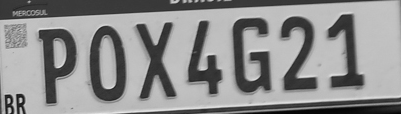

In [115]:
placa = imagem[y: y+h, x: x+w]
cv2_imshow(placa)

## 3. Fazer limiarização, erosão e nova extração com tesseract

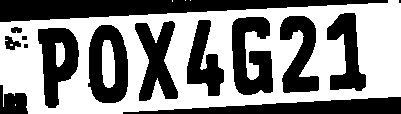



Texto da placa s/ erosão: “POX4G21

Texto da placa c/ erosão: “POX4E21



In [118]:
#1 Limiarização de otsu
valor_Placa, lim_ostuPlaca = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#cv2_imshow(lim_ostuPlaca)
#print(f'\nlimiar: {valor_Placa}')

#2 Erosão
kernel_placa = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
erosao_placa = cv2.erode(lim_ostuPlaca, kernel_placa)
cv2_imshow(erosao_placa)

#3 Tesseract
config_tesseract_placa = '--tessdata-dir tessdata --psm 6'
texto_placa = pytesseract.image_to_string(lim_ostuPlaca, lang = 'por',  config = config_tesseract_placa)
texto_placa_erosao = pytesseract.image_to_string(erosao_placa, lang = 'por',  config = config_tesseract_placa)
print('\n')
print(f'Texto da placa s/ erosão: {texto_placa}')
print(f'Texto da placa c/ erosão: {texto_placa_erosao}')

In [121]:
import re
texto_placa_regex = re.search('\w{3}\d{1}\w{1}\d{2}',texto_placa)
print(f'Texto da placa v2 - dados: {texto_placa_regex}\n')
print(f'Texto da placa v2 - texto: {texto_placa_regex.group(0)}')

Texto da placa v2 - dados: <re.Match object; span=(1, 8), match='POX4G21'>

Texto da placa v2 - texto: POX4G21


# Estratégia Black Hat (chapéu preto)

## 1. Ler imagem e transformar para escala de cinza

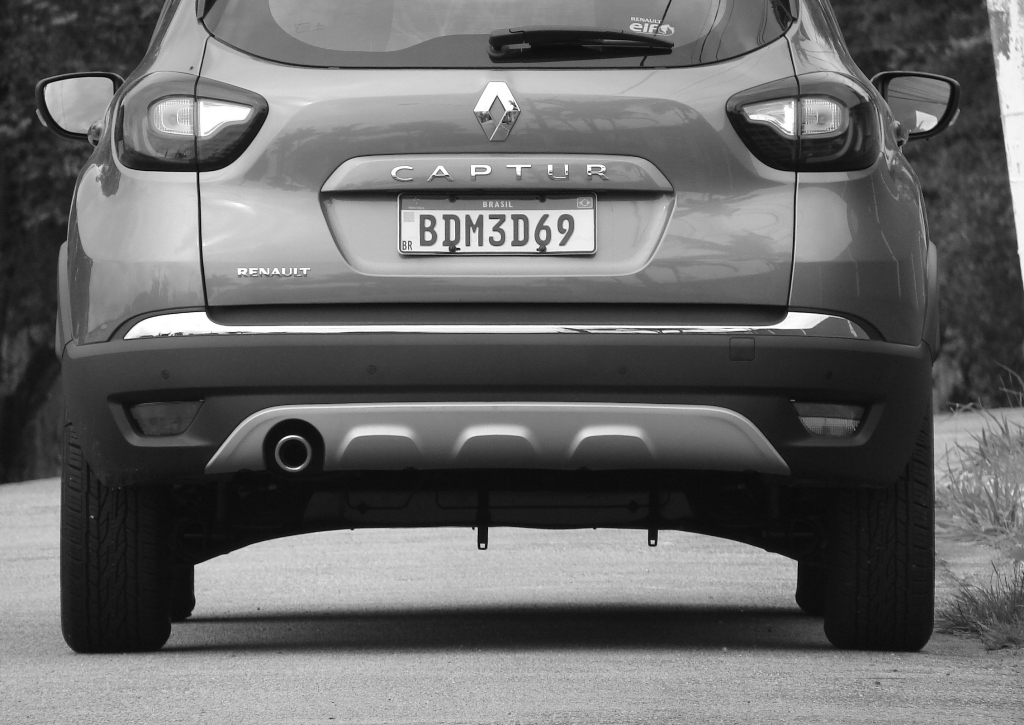

In [133]:
imagem = cv2.imread('/content/Imagens/placa_carro3.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

## 2. Aplicar a transformação morfológica chapéu preto

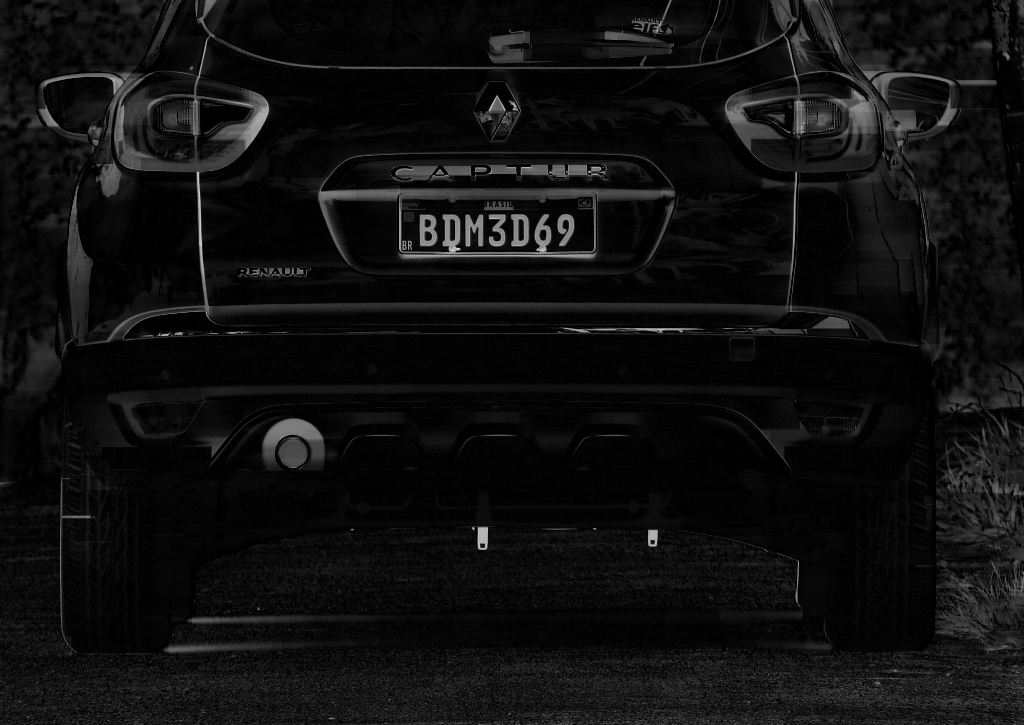

In [134]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(chapeu_preto)

## 3. Aplicar o Sobel para destacar as bordas

Sobel link: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
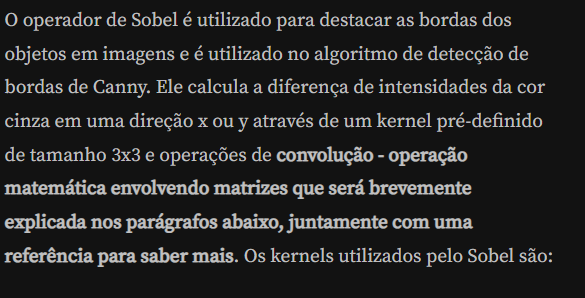

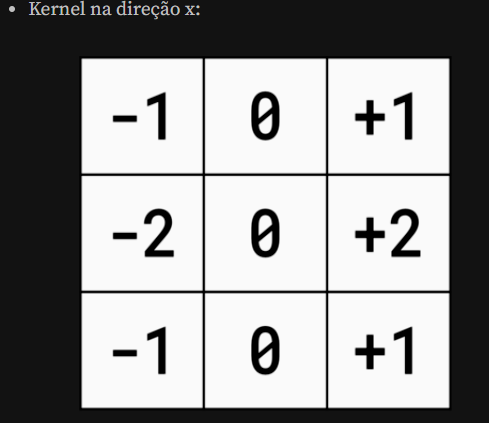

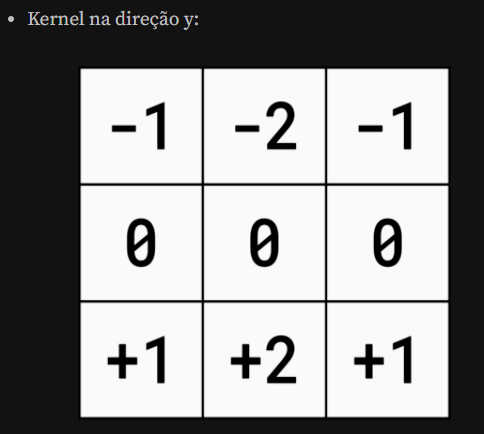

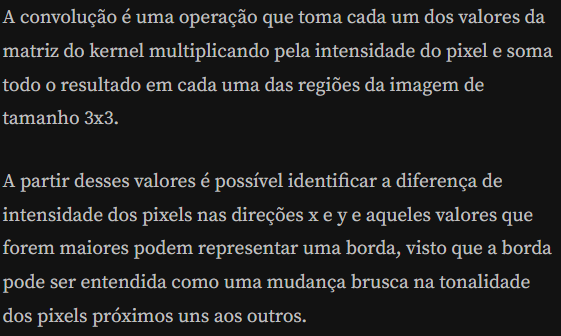

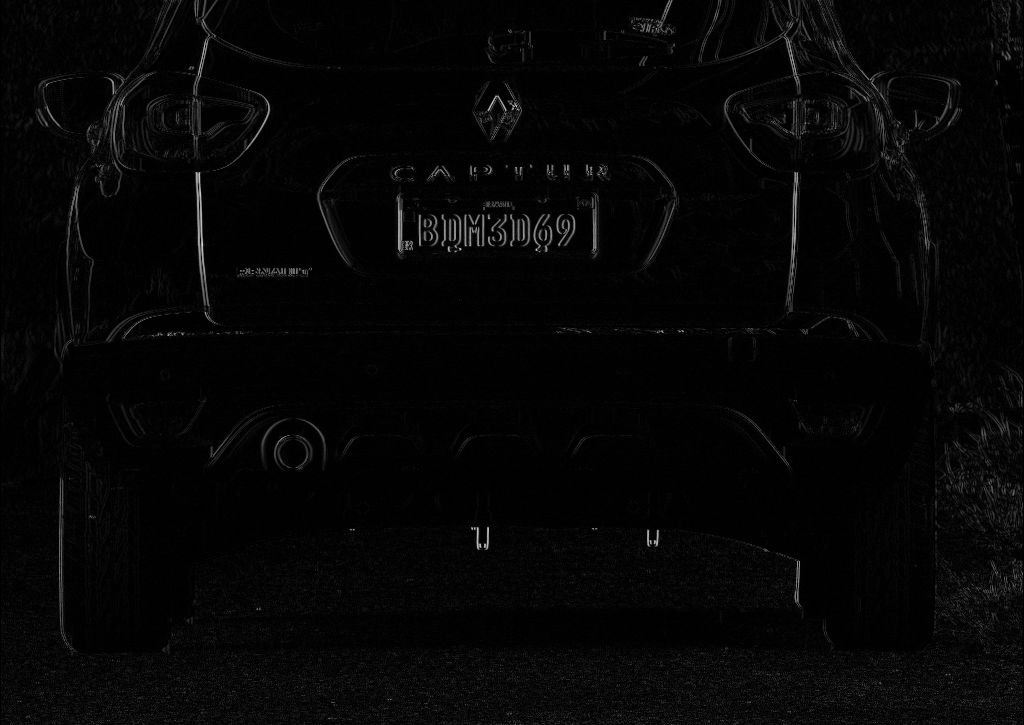

In [135]:
# Sobel vai avaliar intensidade de um pixel para outro na direção desejada e dar um destaque na borda dos caracteres
# cv2.CV_32F 32 bits e float - > paa fazer contas com números negativos
#  dx = 1, dy = 0 -> indica que está passando o sobel na direção x
# ksize = 1 -> intensidade. pode sr 1,3,5 e 7
# astype('uint8') -> converte os valores float para 8 bits

import numpy as np

sobel_x = cv2.Sobel(chapeu_preto, ddepth= cv2.CV_32F, dx = 1, dy = 0, ksize = 1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
cv2_imshow(sobel_x)


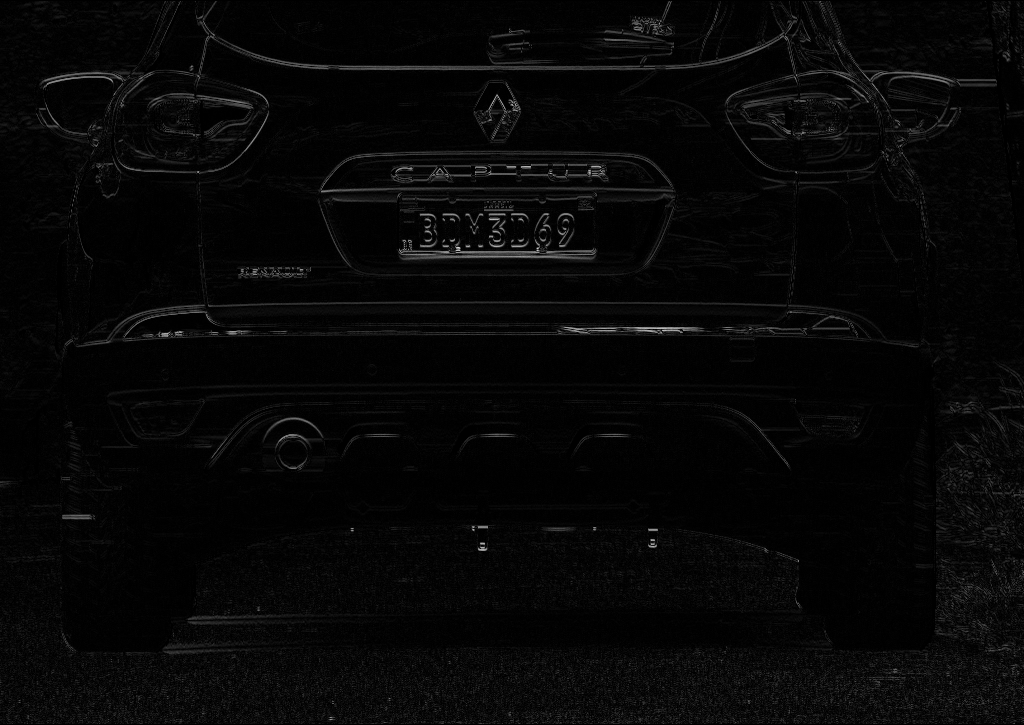

In [136]:
sobel_y = cv2.Sobel(chapeu_preto, ddepth= cv2.CV_32F, dx = 0, dy = 1, ksize = 1)
sobel_y = np.absolute(sobel_y)
sobel_y = sobel_y.astype('uint8')
cv2_imshow(sobel_y)

## 4. Aplicar o gaussianblur para limpar os ruídos (em branco) causados pelo sobel, antes de fazer o fechamento

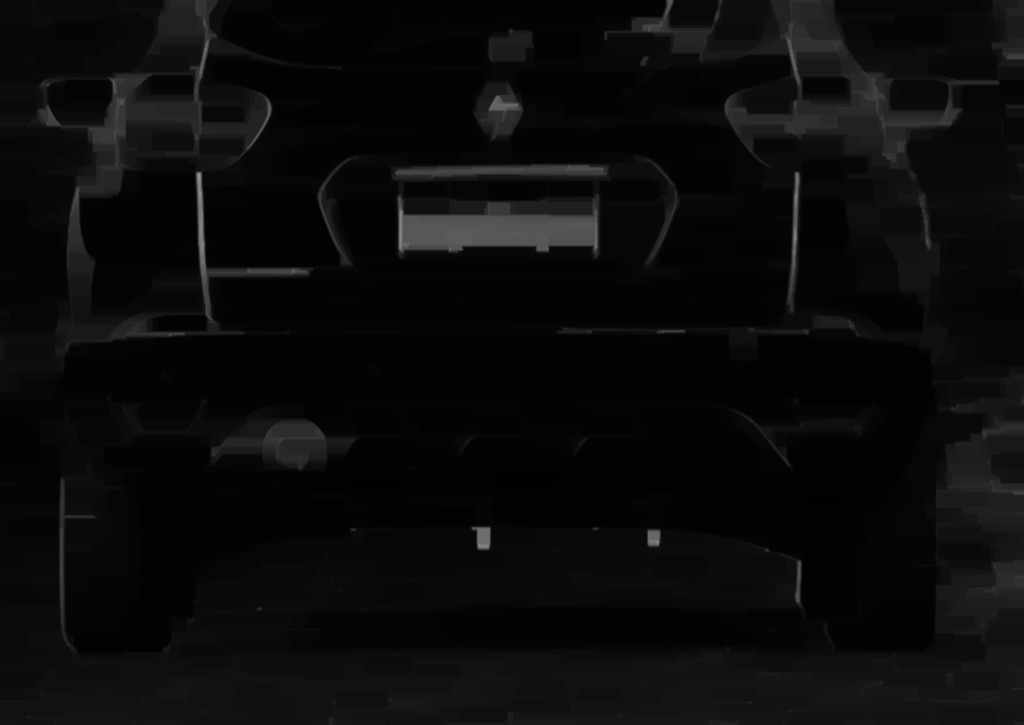

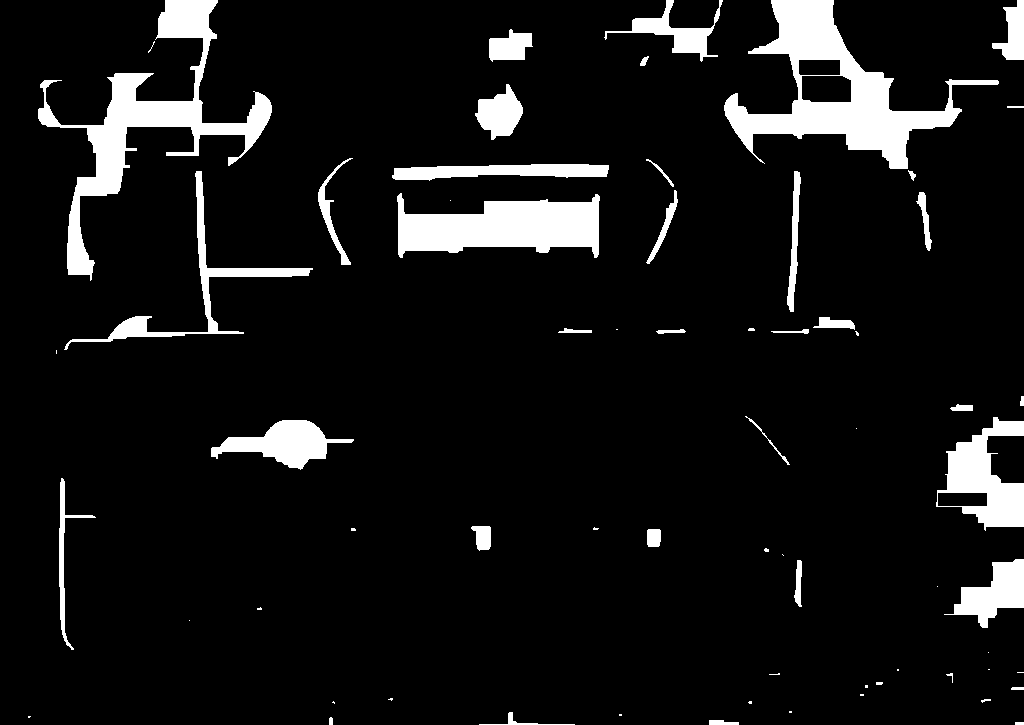

In [137]:
# (5,5) -> tamanho do kernel
# 0 -> intensidade do blur

sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
cv2_imshow(sobel_x)

#aplicar limiarização

valor, lim_ostu = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_ostu)

## 5. Fazer uma erosão com kernel (3,3) para limpar os pontos em branco da imagem limiarizada. E depois dilatação

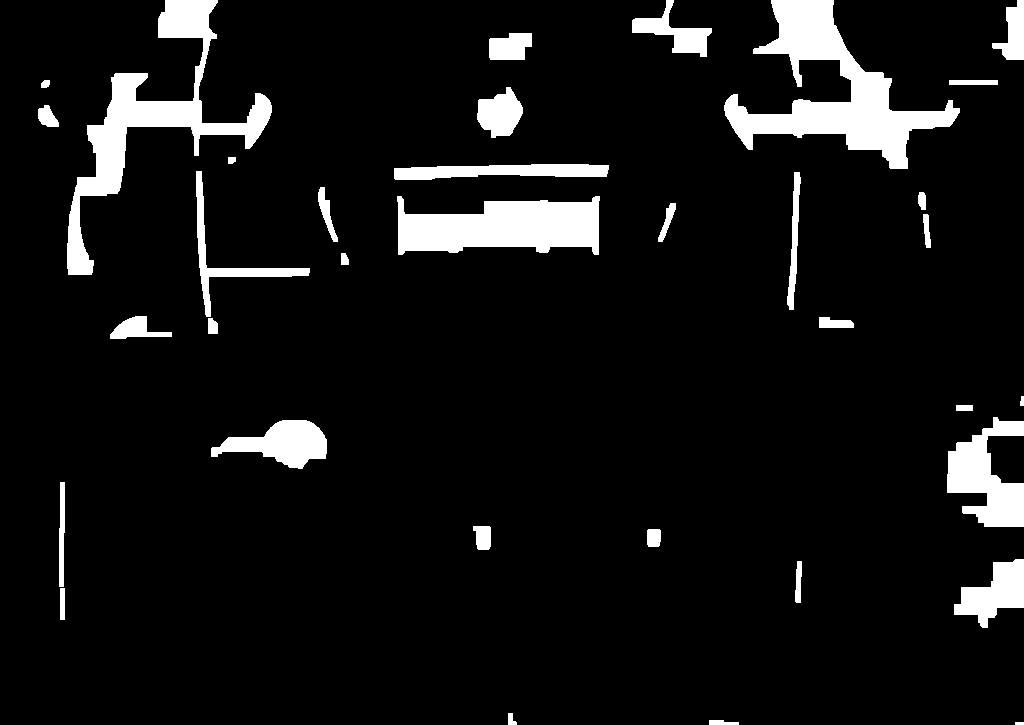

In [141]:
# iterations = 2 - > aplica 2 erosões/dilatações

kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

erosao = cv2.erode(lim_ostu, kernel_quadrado, iterations = 2)
imagem_final = cv2.dilate(erosao, kernel_quadrado, iterations = 2)
cv2_imshow(dilatacao)

## 6. Criar uma máscara em cima da imagem de escala de cinza

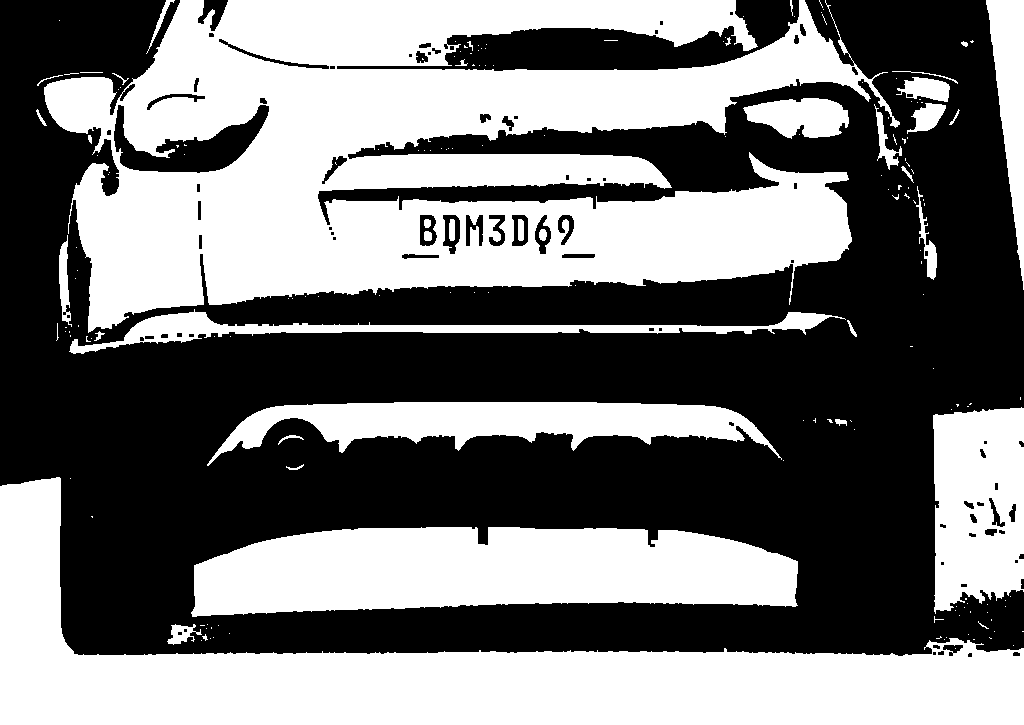

In [140]:
# 1 aplicar o fechamento na imagem de escala de cinza
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(mascara)

Usar o bitwise and para sobrepor a imagem na máscara e extrair apenas o que estiver em branco na máscara.

Link operações aritiméticas: https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

Link bitwise: https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14


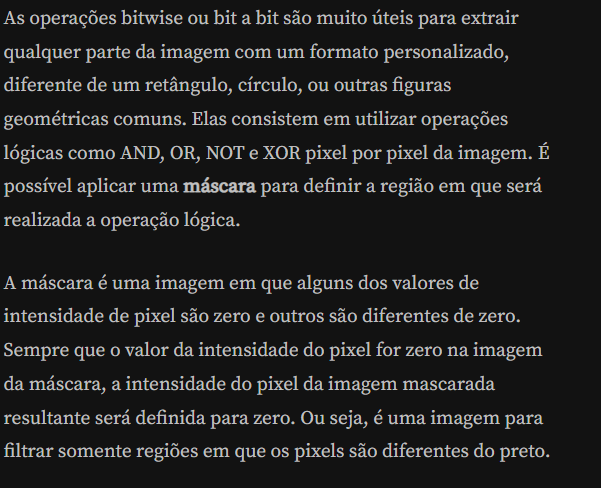

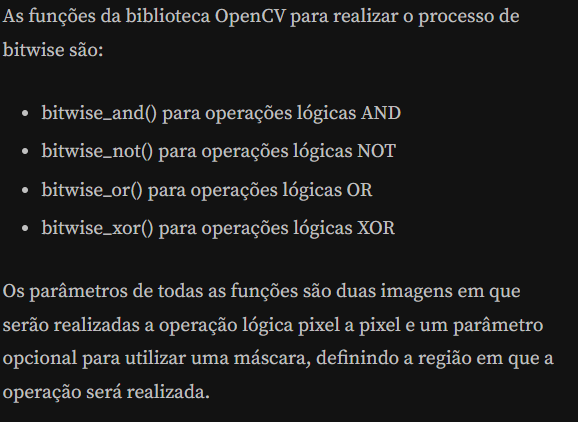

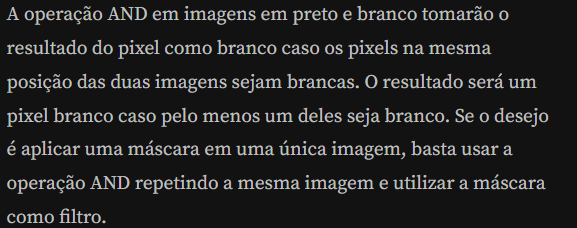

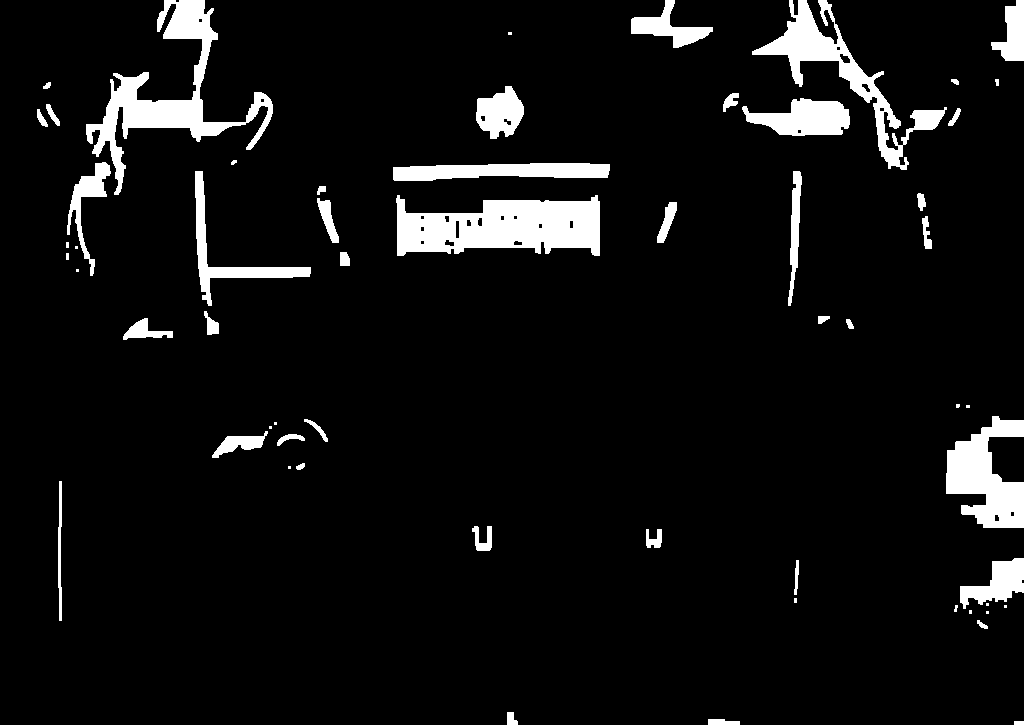

In [142]:
imagem_final = cv2.bitwise_and(imagem_final, imagem_final, mask = mascara )

#aplicar a dilatação para expandir a regiao branca já que a máscara não pega caracterres pretos
imagem_final = cv2.dilate(imagem_final, kernel_quadrado, iterations = 2)

#aplicar erosão para manter a espessura dos caracteres
imagem_final = cv2.erode(imagem_final, kernel_quadrado)
cv2_imshow(imagem_final)

## 7. Usar o clear border do Scikit image para retirar todos os pixeis brancos que tocam a borda (1) e os pixeis (2) que estão conectados nesses itens que tocam a borda (1)

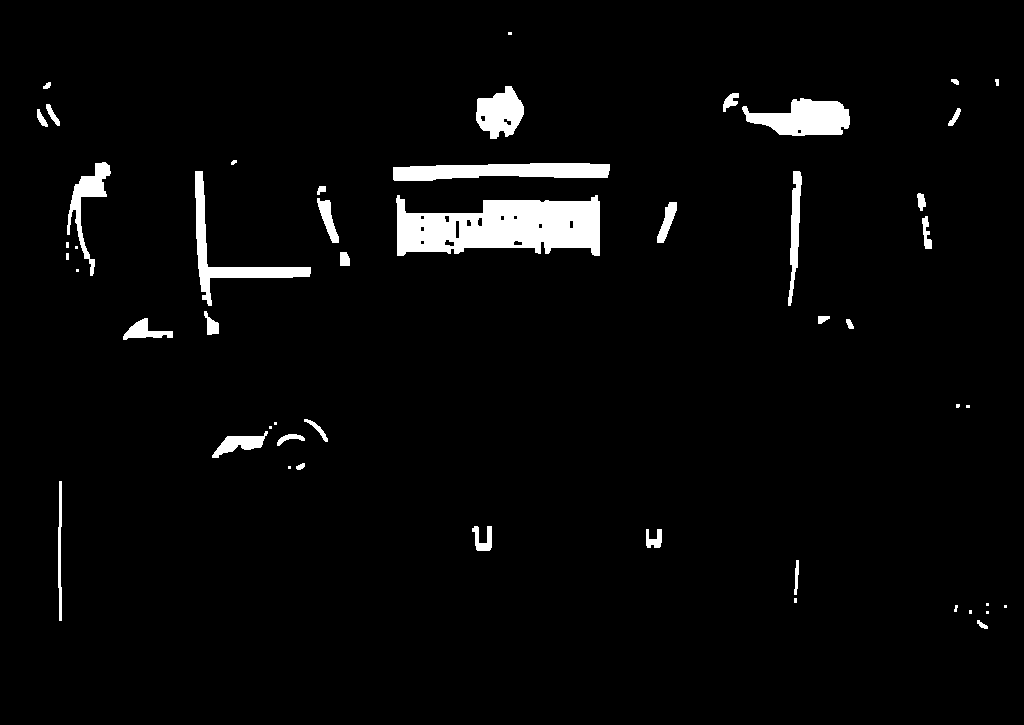

In [143]:
from skimage.segmentation import clear_border
imagem_final = clear_border(imagem_final)
cv2_imshow(imagem_final)

In [146]:
contornos, hierarquia = cv2.findContours(imagem_final, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key= cv2.contourArea, reverse = True)[:10]
contornos

[array([[[397, 195]],
 
        [[397, 197]],
 
        [[396, 198]],
 
        [[396, 202]],
 
        [[397, 203]],
 
        [[397, 255]],
 
        [[403, 255]],
 
        [[405, 253]],
 
        [[405, 252]],
 
        [[406, 251]],
 
        [[446, 251]],
 
        [[448, 253]],
 
        [[450, 253]],
 
        [[450, 249]],
 
        [[451, 248]],
 
        [[453, 248]],
 
        [[454, 249]],
 
        [[454, 253]],
 
        [[458, 253]],
 
        [[460, 251]],
 
        [[463, 251]],
 
        [[463, 248]],
 
        [[464, 247]],
 
        [[534, 247]],
 
        [[535, 248]],
 
        [[535, 252]],
 
        [[537, 252]],
 
        [[538, 253]],
 
        [[540, 253]],
 
        [[540, 242]],
 
        [[541, 241]],
 
        [[543, 241]],
 
        [[544, 242]],
 
        [[544, 247]],
 
        [[545, 248]],
 
        [[545, 253]],
 
        [[548, 253]],
 
        [[549, 252]],
 
        [[549, 251]],
 
        [[550, 250]],
 
        [[550, 248]],
 
        [[551, 2

vamos identificar a placa através da proporção dos contornos. Uma placa de tamanho real tem tamanho 40 x 13 -> 40/13 = 3,0769. Neste caso vamos usar de 3 - 3,5 por causa dos ruídos em volta da placa

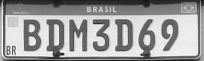

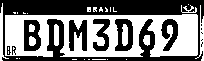

In [147]:
for contorno in contornos:
  x, y, w, h = cv2.boundingRect(contorno)
  proporcao = float(w)/h
  if proporcao >= 3 and proporcao <= 3.5:
    placa = imagem[y: y+h, x: x+w]
    valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    reigao_interesse = clear_border(regiao_interesse)   #faz uma nova limpeza das bordas
    cv2_imshow(placa)
    cv2_imshow(regiao_interesse)

## 8.Extrair texto com tesseract

In [149]:
texto = pytesseract.image_to_string(regiao_interesse, lang = 'por', config= config_tesseract)
print(f'Texto extraído: {texto}')

Texto extraído: L BDM3D69 |



In [150]:
import re
texto_placa_regex = re.search('\w{3}\d{1}\w{1}\d{2}',texto)
print(f'Texto da placa v2 - dados: {texto_placa_regex}\n')
print(f'Texto da placa v2 - texto: {texto_placa_regex.group(0)}')

Texto da placa v2 - dados: <re.Match object; span=(2, 9), match='BDM3D69'>

Texto da placa v2 - texto: BDM3D69
